# FiFa21

In [4]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [5]:
# Creating the initial dataframe
df = pd.read_csv('./Copy of fifa21.csv')
df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,Left,5,"Feb 8, 2018",NaN,€625K,€3K,€891K,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3 ★,2★,Medium

# Data cleaning

In [6]:
# We drop the ID, they are all unique values, the same goes with the name
df=df.drop(['ID'], axis=1)
df=df.drop(['Name'], axis=1)
# Team and contract is a combination of two other columns so we drop it as it is a duplicate
df=df.drop(['Team & Contract'], axis=1)

In [7]:
# We drop any duplicates
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [8]:
# Checking for NaN values
pd.set_option('display.max_rows', 101)
df.isna().sum()

Age                     0
Nationality             0
Club                   18
BP                      0
Position              288
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 41
Loan Date End       11072
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                41
Skill                   0
Dribbling               0
Curve                  41
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed            0
Agility                41
Reactions               0
Balance                41
Power                   0
Shot Power              0
Jumping                41
Stamina                 0
Strength                0
Long Shots  

In [9]:
# Convert it so snake format
cols = []
for column in df.columns:
    cols.append(column.lower())
df.columns = cols
cols = []
for column in df.columns:
    cols.append(column.replace(' ','_'))
df.columns = cols

In [10]:
df.columns

Index(['age', 'nationality', 'club', 'bp', 'position', 'height', 'weight',
       'foot', 'growth', 'joined', 'loan_date_end', 'value', 'wage',
       'release_clause', 'contract', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', '

In [11]:
# Loan date end is over 90% empty values, so we drop the whole column
df=df.drop(['loan_date_end'], axis=1) 
df.shape

(11701, 97)

In [12]:
# Only 18 players have missing values for the club so we just drop them
df = df[df['club'].isna()==False]
df.shape

(11683, 97)

In [13]:
# We have about 280 rows of empty psotions we fill it with the modal value
pd.set_option('display.max_rows', 101)
df['position'].value_counts()
df['position'] = df['position'].fillna('CB')

In [14]:
# We see that the NaN values share the same columns so we drop the according rows
pd.set_option('display.max_columns', None)
df2= df[df['joined'].isna()]
df2[['joined','volleys','curve','agility','balance','jumping','vision','sliding_tackle']]

,joined,volleys,curve,agility,balance,jumping,vision,sliding_tackle
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df[df['joined'].isna()==False]
df.shape

(11646, 97)

In [16]:
# The remaining NULL valuesa are a small percentage of our dataset, we drop the rest
df = df[df['composure'].isna()==False]
df = df[df['a/w'].isna()==False]
df = df[df['d/w'].isna()==False]
# Checking for NaN values
pd.set_option('display.max_rows', 101)
df.isna().sum()

# All null values are dealt with

age                 0
nationality         0
club                0
bp                  0
position            0
height              0
weight              0
foot                0
growth              0
joined              0
value               0
wage                0
release_clause      0
contract            0
attacking           0
crossing            0
finishing           0
heading_accuracy    0
short_passing       0
volleys             0
skill               0
dribbling           0
curve               0
fk_accuracy         0
long_passing        0
ball_control        0
movement            0
acceleration        0
sprint_speed        0
agility             0
reactions           0
balance             0
power               0
shot_power          0
jumping             0
stamina             0
strength            0
long_shots          0
mentality           0
aggression          0
interceptions       0
positioning         0
vision              0
penalties           0
composure           0
defending 

In [17]:
# Transforming height to cm
def heigh_convert(ht):
    feet = int(ht[0])
    inch = int(ht[2])
    ht = feet*30.48 + inch*2.54
    return ht
df['height'] = df['height'].map(heigh_convert)
df


,age,nationality,club,bp,position,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,175.26,161lbs,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,182.88,159lbs,Right,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,Italy,Al Hilal,CAM,CAM CF,162.56,134lbs,Right,0,"Jan 31, 2019",€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,Wales,Swansea City,CDM,CDM CM,154.94,152lbs,Right,13,"Jul 1, 2016",€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,France,US Orléans Loiret Football,CDM,CDM CM,154.94,150lbs,Right,8,"Jul 1, 2018",€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,Peru,Melgar FBC,ST,ST,170.18,154lbs,Right,0,"Jul 1, 2019",€550K,€500,€1.2M,2019 ~ 2021,290,36,72,65,57,60.0,283,62,56.0,56,46,63,368,67,65,76.0,71,89.0,303,64,58.0,56,60,65,254,50,33.0,64.0,37.0,70,60.0,80,41,19,20.0,60,12,13,8,13,14,1638,337,3 ★,3★,High,Low,1 ★,66,68,47,66,33,57,4,65+0,65+0,65+0,61+0,63+0,63+0,63+0,61+0,60+2,60+2,60+2,58+2,53+2,53+2,53+2,58+2,46+2,45+2,45+2,45+2,46+2,44+2,43+2,43+2,43+2,44+2,19+2,65
11696,25,Iceland,Jagiellonia Białystok,LB,LB,185.42,168lbs,Left,5,"Feb 8, 2018",€625K,€3K,€891K,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,

In [18]:
# Converting foot type to 1 and 0
df['foot'] = df['foot'].map({'Right':1,'Left':0})
df

,age,nationality,club,bp,position,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,175.26,161lbs,1,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,182.88,159lbs,1,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,Italy,Al Hilal,CAM,CAM CF,162.56,134lbs,1,0,"Jan 31, 2019",€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,Wales,Swansea City,CDM,CDM CM,154.94,152lbs,1,13,"Jul 1, 2016",€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,France,US Orléans Loiret Football,CDM,CDM CM,154.94,150lbs,1,8,"Jul 1, 2018",€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,Peru,Melgar FBC,ST,ST,170.18,154lbs,1,0,"Jul 1, 2019",€550K,€500,€1.2M,2019 ~ 2021,290,36,72,65,57,60.0,283,62,56.0,56,46,63,368,67,65,76.0,71,89.0,303,64,58.0,56,60,65,254,50,33.0,64.0,37.0,70,60.0,80,41,19,20.0,60,12,13,8,13,14,1638,337,3 ★,3★,High,Low,1 ★,66,68,47,66,33,57,4,65+0,65+0,65+0,61+0,63+0,63+0,63+0,61+0,60+2,60+2,60+2,58+2,53+2,53+2,53+2,58+2,46+2,45+2,45+2,45+2,46+2,44+2,43+2,43+2,43+2,44+2,19+2,65
11696,25,Iceland,Jagiellonia Białystok,LB,LB,185.42,168lbs,0,5,"Feb 8, 2018",€625K,€3K,€891K,2018 ~ 2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3 ★,2★,Medium,M

In [19]:
# Transforming weight to integers
def weight_convert(wt):
    wt = wt[0:3]
    wt = int(wt)
    return wt
df['weight'] = df['weight'].map(weight_convert)

In [20]:
# Removing the star sign from three columns
cols = ['w/f', 'sm','ir']
for col in cols:
    df[col] = df[col].map(lambda x: str(x).lstrip('★').rstrip('★')).astype(float)
df[['w/f', 'sm','ir']] = df[['w/f', 'sm','ir']].astype(int)
df.head(5)

,age,nationality,club,bp,position,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,175.26,161,1,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,182.88,159,1,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,Italy,Al Hilal,CAM,CAM CF,162.56,134,1,0,"Jan 31, 2019",€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,Wales,Swansea City,CDM,CDM CM,154.94,152,1,13,"Jul 1, 2016",€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,France,US Orléans Loiret Football,CDM,CDM CM,154.94,150,1,8,"Jul 1, 2018",€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [21]:
# The joined and contract columns have overlapping information, we transform them so that
# the joined column represent the start of the contract
# the contract column represents the end of the contract 
def clause_convert(c):
    c = int(c[-4:])
    return c
df['joined'] = df['joined'].map(clause_convert)

In [22]:
# There are some free players, we replace there contractz end date with their joined date,
# because it is the closest time of them playing that we know of
df['contract'] = np.where(df['contract'] == "Free", df['joined'], df['contract'])
df['contract'] = np.where(df['contract'] == "Ivory Coast Free", df['joined'], df['contract'])

In [23]:
def clause_convert2(c):
    c = str(c)
    if c[-4:].isdigit():
        c = int(c[-4:])
    else:
        while c[-1:].isdigit() == False:
            c = c[:-1]
        c = int(c[-4:])
    return c
c = "2017"
print(clause_convert2(c))

2017


In [24]:
df['contract'] = df['contract'].map(clause_convert2)

In [25]:
pd.set_option('display.max_rows', 300)
df['contract'].value_counts()

2021    3702
2022    2546
2023    1924
2020    1341
2024    1076
2025     298
2019     256
2018     133
2017      66
2016      18
2014      13
2015       9
2013       8
2011       7
2012       5
2009       3
2010       3
2005       1
2027       1
2026       1
Name: contract, dtype: int64

In [26]:
# Replacing low medium and high with 1,2,3
df['a/w'] = df['a/w'].map({'Low':0,'Medium':1,'High':2})
df['d/w'] = df['d/w'].map({'Low':0,'Medium':1,'High':2})
df['d/w'].value_counts()

1    8197
2    2002
0    1212
Name: d/w, dtype: int64

In [27]:
# For the last columns we just add the numbers behind the plus sighn to the score
def adder(a):
    a = a.split("+")
    a = int(a[0])+int(a[1])
    return a
df['ls'] = df['ls'].map(adder)
df['st'] = df['st'].map(adder)
df['rs'] = df['rs'].map(adder)
df['lw'] = df['lw'].map(adder)
df['lf'] = df['lf'].map(adder)
df['rf'] = df['rf'].map(adder)
df['lam'] = df['lam'].map(adder)
df['cam'] = df['cam'].map(adder)
df['ram'] = df['ram'].map(adder)
df['lcm'] = df['lcm'].map(adder)
df['cm'] = df['cm'].map(adder)
df['rcm'] = df['rcm'].map(adder)
df['rm'] = df['rm'].map(adder)
df['lwb'] = df['lwb'].map(adder)
df['ldm'] = df['ldm'].map(adder)
df['cdm'] = df['cdm'].map(adder)
df['rdm'] = df['rdm'].map(adder)
df['rwb'] = df['rwb'].map(adder)
df['lb'] = df['lb'].map(adder)
df['lcb'] = df['lcb'].map(adder)
df['cb'] = df['cb'].map(adder)
df['rcb'] = df['rcb'].map(adder)
df['rb'] = df['rb'].map(adder)
df['gk'] = df['gk'].map(adder)
df['cf'] = df['cf'].map(adder)
df['rw'] = df['rw'].map(adder)
df['lm'] = df['lm'].map(adder)

In [28]:
df.head(1)

,age,nationality,club,bp,position,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,175.26,161,1,1,2015,€525K,€4K,€801K,2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,2,1,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64


In [29]:
# We convert the money values to integers
def moneycon(a):
    a = str(a)
    a = a.replace('€','')
    a = a.replace('.','')
    a = a.replace('K','000')
    a = a.replace('M','000000')
    return int(a)
df['release_clause'] = df['release_clause'].map(moneycon)
df['value'] = df['value'].map(moneycon)
df['wage'] = df['wage'].map(moneycon)
df

,age,nationality,club,bp,position,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,175.26,161,1,1,2015,525000,4000,801000,2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,2,1,1,69,51,63,63,51,60,3,59,59,59,61,62,62,62,61,64,64,64,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,182.88,159,1,0,2015,85000000,23000,0,2020,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,0,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,70,70,70,77,59,55,55,55,59,55,50,50,50,55,20,77
2,33,Italy,Al Hilal,CAM,CAM CF,162.56,134,1,0,2019,9000000,49000,153000000,2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,1,2,80,77,78,86,27,56,73,75,75,75,80,79,79,79,80,80,80,80,80,76,76,76,80,61,58,58,58,61,55,43,43,43,55,14,80
3,22,Wales,Swansea City,CDM,CDM CM,154.94,152,1,13,2016,275000,4000,694000,2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,1,1,57,44,54,57,57,60,7,52,52,52,51,51,51,51,51,55,55,55,55,58,58,58,55,58,60,60,60,58,59,60,60,60,59,16,59
4,23,France,US Orléans Loiret Football,CDM,CDM CM,154.94,150,1,8,2018,725000,2000,14000000,2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,0,1,1,66,44,60,64,60,66,4,58,58,58,59,59,59,59,59,63,63,63,64,65,65,65,64,66,66,66,66,66,65,63,63,63,65,17,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,Peru,Melgar FBC,ST,ST,170.18,154,1,0,2019,550000,500,12000000,2021,290,36,72,65,57,60.0,283,62,56.0,56,46,63,368,67,65,76.0,71,89.0,303,64,58.0,56,60,65,254,50,33.0,64.0,37.0,70,60.0,80,41,19,20.0,60,12,13,8,13,14,1638,337,3,3,2,0,1,66,68,47,66,33,57,4,65,65,65,61,63,63,63,61,62,62,62,60,55,55,55,60,48,47,47,47,48,46,45,45,45,46,21,65
11696,25,Iceland,Jagiellonia Białystok,LB,LB,185.42,168,0,5,2018,625000,3000,891000,2021,224,62,24,51,59,28.0,248,57,49.0,29,54,59,333,78,73,68.0,53,61.0,273,31,72.0,77,68,25,266,63,59.0,51.0,54.0,39,46.0,184,59,64,61.0,61,13,14,14,6,14,1589,347,3,2,1,1,1,75,28,56,59,60,69,3,50,50,50,55,52,52,52,55,56,56,56,60,58,58,58,60,65,62,62,62,65,65,63,63,63,65,18,65
11697,27,France,ESTAC Troyes,GK,GK,185.42,174,1,4,2019,16000000,4000,29000000,2022,84,12,14,13,29,16.0,96,17,15.0,19,27,18,237,40,40,38.0,65,54.0,217,50,59.0,29,64,15,101,30,22.0,15.0,15.0,19,56.0,41,12,16,13.0,347,72,67,66,70,72,1123,387,2,1,1,1,1,72,67,66,72,40,70,3,30,30,30,24,26,26,26,24,26,26,26,27,27,27,27,27,27,28,28,28,27,26,28,28,28,26,71,70
11698,22,Chile,CD Antofagasta,RM,LM CAM RM,167.64,143,1,8,2019,

In [30]:
# We convert hits to integers
df['hits'] = df['hits'].map(moneycon)
df.dtypes

age                   int64
nationality          object
club                 object
bp                   object
position             object
height              float64
weight                int64
foot                  int64
growth                int64
joined                int64
value                 int64
wage                  int64
release_clause        int64
contract              int64
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration          int64
sprint_speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot_power            int64
jumping             float64
stamina             

In [31]:
#df2 = df[['ls','st','rs','lw','lf','rf','lam','cam','ram','lcm','cm','rcm',
#          'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','cf','rw','lm','ova']]
#for row in df2.index:
#    print(f'Max element of row {row} is:', max(df2.iloc[row]))

## Split into categoricals and numericals

In [32]:
# selecting rows dependend on object type
import matplotlib.pyplot as plt
import seaborn as sns
numericals = df.select_dtypes(['number'])
categoricals = df.select_dtypes(['object'])

In [33]:
df2 = df[['ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']].copy()

In [34]:
# sns.pairplot(df2)

In [35]:
correlations_matrix = df2.corr()
correlations_matrix
df3 = df2[['ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']].copy()
# Because of multicollinearity we drop the following columns:
numericals = numericals.drop(['st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm', 'lb', 'lcb', 'cb', 'rcb', 'rb','lwb',
       'ldm', 'cdm', 'rdm'], axis=1) 

In [36]:
# Now we look at the other labels
correlations_matrix = numericals.corr()
correlations_matrix


,age,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,rwb,gk,ova
age,1.000000,0.065960,0.251508,0.012086,-0.865104,-0.222975,0.101162,0.195210,0.085880,-0.232167,0.187928,0.156527,0.106856,0.172814,0.180770,0.184362,0.173972,0.044982,0.180512,0.224655,0.228428,0.123984,-0.037140,-0.174398,-0.165561,-0.028931,0.502873,-0.082651,0.327097,0.309908,0.204344,0.089083,0.352926,0.197116,0.275846,0.279253,0.194504,0.122081,0.240105,0.186547,0.425771,0.124094,0.165139,0.111608,0.090246,0.120801,0.117917,0.118181,0.117258,0.127591,0.115181,0.291182,0.421562,0.086784,0.081303,-0.013159,0.072593,0.373446,-0.164066,0.306585,0.396753,0.243720,0.228814,0.443823,-0.044577,0.166784,0.158740,0.152996,0.517107
height,0.065960,1.000000,0.508814,0.059612,-0.032765,0.001356,0.018164,0.019972,0.014715,-0.003542,-0.296582,-0.400089,-0.285489,0.000797,-0.284733,-0.270403,-0.361668,-0.385169,-0.350517,-0.315135,-0.251443,-0.329992,-0.472824,-0.423201,-0.358471,-0.472049,-0.000820,-0.545837,-0.138494,-0.130956,-0.009969,-0.245006,0.350337,-0.298972,-0.258822,-0.037324,-0.056863,-0.351999,-0.283977,-0.247062,-0.117525,-0.067323,-0.064335,-0.063415,-0.070035,0.290872,0.287208,0.286767,0.284905,0.288865,0.287214,-0.302344,-0.102990,-0.121666,-0.324100,-0.198307,0.047342,0.040708,-0.281277,-0.061045,-0.151442,-0.220523,0.046859,0.282285,0.001397,-0.295178,-0.254389,0.290926,0.030797
weight,0.251508,0.508814,1.000000,0.080514,-0.218248,-0.032856,0.045000,0.065386,0.032409,-0.039652,-0.254924,-0.393404,-0.266395,0.095938,-0.264514,-0.234948,-0.354809,-0.399364,-0.341393,-0.298580,-0.237901,-0.321909,-0.539504,-0.494704,-0.408195,-0.557296,0.112991,-0.664523,0.007555,-0.041272,0.075686,-0.211579,0.645750,-0.260104,-0.202041,0.057485,-0.017407,-0.330435,-0.273108,-0.210631,-0.043454,-0.042049,-0.028960,-0.041434,-0.052552,0.322325,0.317825,0.318369,0.314791,0.321102,0.318037,-0.245600,0.004058,-0.120844,-0.350879,-0.216374,0.078956,0.112642,-0.340966,0.010340,-0.103194,-0.209972,0.100697,0.538487,-0.023898,-0.249431,-0.230745,0.329798,0.146410
foot,0.012086,0.059612,0.080514,1.000000,0.008825,-0.012587,-0.004408,-0.013665,-0.014385,-0.009589,-0.085837,-0.191996,-0.024367,-0.025856,-0.086122,-0.037303,-0.132448,-0.118085,-0.146863,-0.135421,-0.094797,-0.101358,-0.102759,-0.108321,-0.100704,-0.093815,0.003940,-0.089853,-0.024268,-0.006600,0.039659,-0.068562,0.054321,-0.064683,-0.086649,-0.044954,-0.094715,-0.075156,-0.046208,-0.041172,-0.040492,-0.107853,-0.099113,-0.104731,-0.112779,0.099501,0.097096,0.097888,0.099913,0.098868,0.097266,-0.104386,-0.041499,0.106738,-0.093686,-0.058292,0.032773,0.008025,-0.058065,0.052379,-0.056621,-0.040394,-0.076545,0.052223,-0.006265,-0.067173,-0.135909,0.099518,-0.024144
growth,-0.865104,-0.032765,-0.218248,0.008825,1.000000,0.172861,-0.169966,-0.233388,-0.162409,0.167430,-0.280772,-0.252472,-0.189222,-0.228567,-0.272489,-0.250659,-0.262341,-0.155510,-0.253193,-0.274611,-0.295289,-0.225313,-0.104499,0.022661,0.007993,-0.084889,-0.564908,0.007500,-0.433221,-0.373026,-0.232672,-0.236195,-0.374576,-0.278289,-0.348054,-0.318205,-0.223707,-0.214763,-0.303038,-0.227455,-0.470288,-0.159413,-0.203639,-0.146129,-0.121217,-0.050940,-0.050047,-0.048710,-0.049843,-0.056008,-0.046840,-0.396959,-0.521379,-0.105972,-0.166967,-0.042176,-0.063915,-0.273567,0.013617,-0.335314,-0.441866,-0.324507,-0.243079,-0.490277,0.040714,-0.275012,-0.256180,-0.087680,-0.601212
joined,-0.222975,0.001356,-0.032856,-0.012587,0.172861,1.000000

In [37]:
numericals.columns

Index(['age', 'height', 'weight', 'foot', 'growth', 'joined', 'value', 'wage',
       'release_clause', 'contract', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'hits', 'ls', 'rwb', 'gk', 'ova'],
      dtype='object')

## Checking for multicollinearity

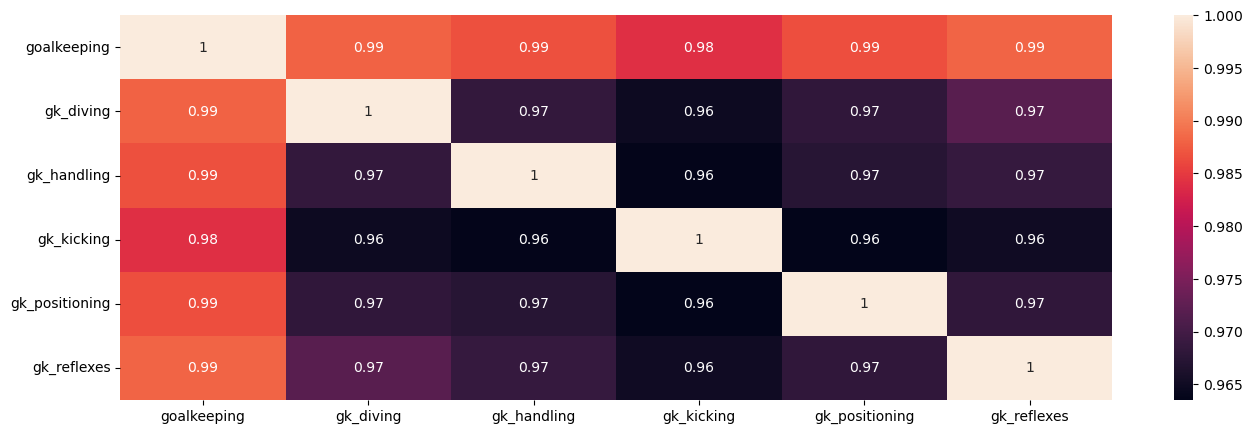

In [38]:
# We see close correlation between 'goalkeeping', 'gk_diving', 'gk_handling','gk_kicking', 'gk_positioning', 'gk_reflexes'
correlations_matrix = numericals[['goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes']].corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# We decide to drop all but 'goalkeeping'
numericals = numericals.drop(['gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],axis=1)

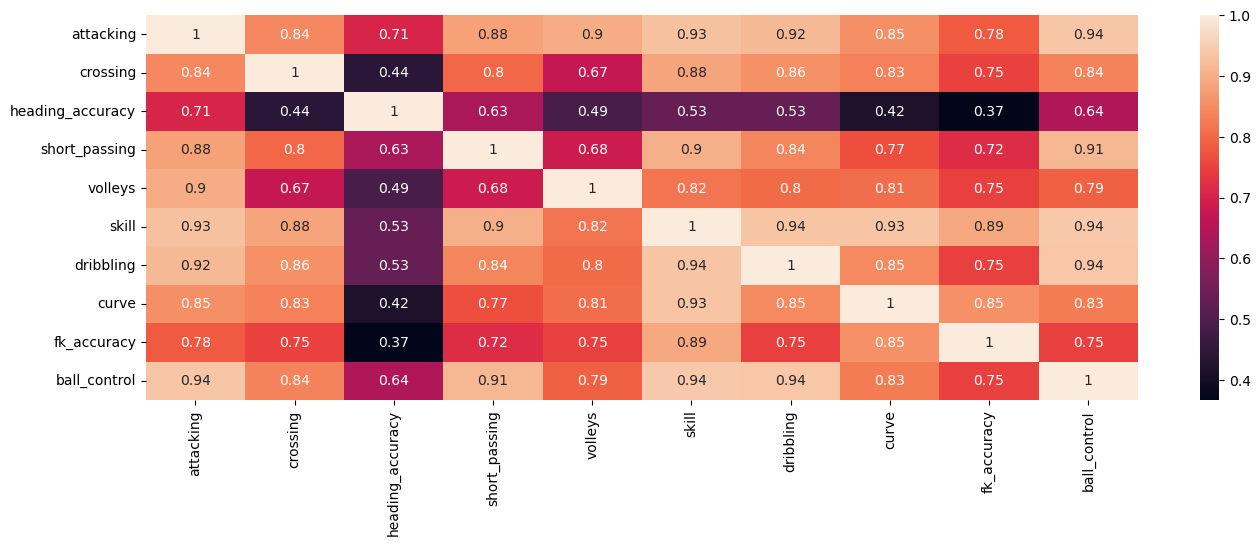

In [39]:
# We see close correlation between 'attacking','crossing','heading_accuracy','short_passing','volleys','skill','dribbling','curve',
#                                 'fk_accuracy','ball_control'
correlations_matrix = numericals[['attacking','crossing','heading_accuracy','short_passing','volleys','skill','dribbling','curve',
                                 'fk_accuracy','ball_control']].corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# We decide to drop all but 'goalkeeping'
numericals = numericals.drop(['crossing','short_passing','volleys','skill','dribbling','curve',
                                 'ball_control'],axis=1)

In [40]:
# We see close correlation between
# ['positioning','goalkeeping','ls']
# ['movement','agility','acceleration']
correlations_matrix = numericals.corr()
display(correlations_matrix)
numericals = numericals.drop(['positioning','goalkeeping','ls','movement','agility','acceleration'],axis=1)

,age,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,finishing,heading_accuracy,fk_accuracy,long_passing,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,rwb,gk,ova
age,1.000000,0.065960,0.251508,0.012086,-0.865104,-0.222975,0.101162,0.195210,0.085880,-0.232167,0.187928,0.106856,0.172814,0.224655,0.228428,-0.037140,-0.174398,-0.165561,-0.028931,0.502873,-0.082651,0.327097,0.309908,0.204344,0.089083,0.352926,0.197116,0.275846,0.279253,0.194504,0.122081,0.240105,0.186547,0.425771,0.124094,0.165139,0.111608,0.090246,0.120801,0.291182,0.421562,0.086784,0.081303,-0.013159,0.072593,0.373446,-0.164066,0.306585,0.396753,0.243720,0.228814,0.443823,-0.044577,0.166784,0.158740,0.152996,0.517107
height,0.065960,1.000000,0.508814,0.059612,-0.032765,0.001356,0.018164,0.019972,0.014715,-0.003542,-0.296582,-0.285489,0.000797,-0.315135,-0.251443,-0.472824,-0.423201,-0.358471,-0.472049,-0.000820,-0.545837,-0.138494,-0.130956,-0.009969,-0.245006,0.350337,-0.298972,-0.258822,-0.037324,-0.056863,-0.351999,-0.283977,-0.247062,-0.117525,-0.067323,-0.064335,-0.063415,-0.070035,0.290872,-0.302344,-0.102990,-0.121666,-0.324100,-0.198307,0.047342,0.040708,-0.281277,-0.061045,-0.151442,-0.220523,0.046859,0.282285,0.001397,-0.295178,-0.254389,0.290926,0.030797
weight,0.251508,0.508814,1.000000,0.080514,-0.218248,-0.032856,0.045000,0.065386,0.032409,-0.039652,-0.254924,-0.266395,0.095938,-0.298580,-0.237901,-0.539504,-0.494704,-0.408195,-0.557296,0.112991,-0.664523,0.007555,-0.041272,0.075686,-0.211579,0.645750,-0.260104,-0.202041,0.057485,-0.017407,-0.330435,-0.273108,-0.210631,-0.043454,-0.042049,-0.028960,-0.041434,-0.052552,0.322325,-0.245600,0.004058,-0.120844,-0.350879,-0.216374,0.078956,0.112642,-0.340966,0.010340,-0.103194,-0.209972,0.100697,0.538487,-0.023898,-0.249431,-0.230745,0.329798,0.146410
foot,0.012086,0.059612,0.080514,1.000000,0.008825,-0.012587,-0.004408,-0.013665,-0.014385,-0.009589,-0.085837,-0.024367,-0.025856,-0.135421,-0.094797,-0.102759,-0.108321,-0.100704,-0.093815,0.003940,-0.089853,-0.024268,-0.006600,0.039659,-0.068562,0.054321,-0.064683,-0.086649,-0.044954,-0.094715,-0.075156,-0.046208,-0.041172,-0.040492,-0.107853,-0.099113,-0.104731,-0.112779,0.099501,-0.104386,-0.041499,0.106738,-0.093686,-0.058292,0.032773,0.008025,-0.058065,0.052379,-0.056621,-0.040394,-0.076545,0.052223,-0.006265,-0.067173,-0.135909,0.099518,-0.024144
growth,-0.865104,-0.032765,-0.218248,0.008825,1.000000,0.172861,-0.169966,-0.233388,-0.162409,0.167430,-0.280772,-0.189222,-0.228567,-0.274611,-0.295289,-0.104499,0.022661,0.007993,-0.084889,-0.564908,0.007500,-0.433221,-0.373026,-0.232672,-0.236195,-0.374576,-0.278289,-0.348054,-0.318205,-0.223707,-0.214763,-0.303038,-0.227455,-0.470288,-0.159413,-0.203639,-0.146129,-0.121217,-0.050940,-0.396959,-0.521379,-0.105972,-0.166967,-0.042176,-0.063915,-0.273567,0.013617,-0.335314,-0.441866,-0.324507,-0.243079,-0.490277,0.040714,-0.275012,-0.256180,-0.087680,-0.601212
joined,-0.222975,0.001356,-0.032856,-0.012587,0.172861,1.000000,-0.099960,-0.208753,-0.122039,0.267966,-0.020805,0.016951,-0.002733,-0.044087,-0.091787,0.010600,0.064740,0.069145,0.019869,-0.199487,0.009193,-0.043874,-0.054934,-0.028359,-0.009448,-0.046829,-0.018783,-0.066871,-0.064687,-0.101069,0.003505,-0.076006,-0.001458,-0.138260,-0.080901,-0.090086,-0.075771,-0.072472,-0.086112,-0.084893,-0.176710,-0.011689,0.003516,0.007996,-0.076378,-0.185112,0.035995,-0.083784,-0.179861,-0.118106,-0.134118,-0.115895,-0.001635,-0.012618,-0.067942,-0.097364,-0.214013
value,0.101162,0.018164,0.045000,-0.004408,-0.169966,-0.099960,1.000000,0.608779,0.688542,0.170635,0.228583,0.177430,0.138515,0.188367,0.250897,0.206513,0.128182,0.131480,0.144463,0.473779,0.085880,0

In [41]:
# We see close correlation between
# ['attacking','total_stats']
# ['defending','marking','standing_tackle','sliding_tackle','def']
correlations_matrix = numericals.corr()
display(correlations_matrix)
numericals = numericals.drop(['total_stats','defending','marking','standing_tackle','sliding_tackle','def'],axis=1)

,age,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,finishing,heading_accuracy,fk_accuracy,long_passing,sprint_speed,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,rwb,gk,ova
age,1.000000,0.065960,0.251508,0.012086,-0.865104,-0.222975,0.101162,0.195210,0.085880,-0.232167,0.187928,0.106856,0.172814,0.224655,0.228428,-0.165561,0.502873,-0.082651,0.327097,0.309908,0.204344,0.089083,0.352926,0.197116,0.275846,0.279253,0.194504,0.240105,0.186547,0.425771,0.124094,0.165139,0.111608,0.090246,0.291182,0.421562,0.086784,0.081303,-0.013159,0.072593,0.373446,-0.164066,0.306585,0.396753,0.243720,0.228814,0.443823,-0.044577,0.158740,0.152996,0.517107
height,0.065960,1.000000,0.508814,0.059612,-0.032765,0.001356,0.018164,0.019972,0.014715,-0.003542,-0.296582,-0.285489,0.000797,-0.315135,-0.251443,-0.358471,-0.000820,-0.545837,-0.138494,-0.130956,-0.009969,-0.245006,0.350337,-0.298972,-0.258822,-0.037324,-0.056863,-0.283977,-0.247062,-0.117525,-0.067323,-0.064335,-0.063415,-0.070035,-0.302344,-0.102990,-0.121666,-0.324100,-0.198307,0.047342,0.040708,-0.281277,-0.061045,-0.151442,-0.220523,0.046859,0.282285,0.001397,-0.254389,0.290926,0.030797
weight,0.251508,0.508814,1.000000,0.080514,-0.218248,-0.032856,0.045000,0.065386,0.032409,-0.039652,-0.254924,-0.266395,0.095938,-0.298580,-0.237901,-0.408195,0.112991,-0.664523,0.007555,-0.041272,0.075686,-0.211579,0.645750,-0.260104,-0.202041,0.057485,-0.017407,-0.273108,-0.210631,-0.043454,-0.042049,-0.028960,-0.041434,-0.052552,-0.245600,0.004058,-0.120844,-0.350879,-0.216374,0.078956,0.112642,-0.340966,0.010340,-0.103194,-0.209972,0.100697,0.538487,-0.023898,-0.230745,0.329798,0.146410
foot,0.012086,0.059612,0.080514,1.000000,0.008825,-0.012587,-0.004408,-0.013665,-0.014385,-0.009589,-0.085837,-0.024367,-0.025856,-0.135421,-0.094797,-0.100704,0.003940,-0.089853,-0.024268,-0.006600,0.039659,-0.068562,0.054321,-0.064683,-0.086649,-0.044954,-0.094715,-0.046208,-0.041172,-0.040492,-0.107853,-0.099113,-0.104731,-0.112779,-0.104386,-0.041499,0.106738,-0.093686,-0.058292,0.032773,0.008025,-0.058065,0.052379,-0.056621,-0.040394,-0.076545,0.052223,-0.006265,-0.135909,0.099518,-0.024144
growth,-0.865104,-0.032765,-0.218248,0.008825,1.000000,0.172861,-0.169966,-0.233388,-0.162409,0.167430,-0.280772,-0.189222,-0.228567,-0.274611,-0.295289,0.007993,-0.564908,0.007500,-0.433221,-0.373026,-0.232672,-0.236195,-0.374576,-0.278289,-0.348054,-0.318205,-0.223707,-0.303038,-0.227455,-0.470288,-0.159413,-0.203639,-0.146129,-0.121217,-0.396959,-0.521379,-0.105972,-0.166967,-0.042176,-0.063915,-0.273567,0.013617,-0.335314,-0.441866,-0.324507,-0.243079,-0.490277,0.040714,-0.256180,-0.087680,-0.601212
joined,-0.222975,0.001356,-0.032856,-0.012587,0.172861,1.000000,-0.099960,-0.208753,-0.122039,0.267966,-0.020805,0.016951,-0.002733,-0.044087,-0.091787,0.069145,-0.199487,0.009193,-0.043874,-0.054934,-0.028359,-0.009448,-0.046829,-0.018783,-0.066871,-0.064687,-0.101069,-0.076006,-0.001458,-0.138260,-0.080901,-0.090086,-0.075771,-0.072472,-0.084893,-0.176710,-0.011689,0.003516,0.007996,-0.076378,-0.185112,0.035995,-0.083784,-0.179861,-0.118106,-0.134118,-0.115895,-0.001635,-0.067942,-0.097364,-0.214013
value,0.101162,0.018164,0.045000,-0.004408,-0.169966,-0.099960,1.000000,0.608779,0.688542,0.170635,0.228583,0.177430,0.138515,0.188367,0.250897,0.131480,0.473779,0.085880,0.275426,0.284593,0.114018,0.186858,0.125027,0.210955,0.250336,0.165562,0.136892,0.291094,0.157037,0.364712,0.118129,0.136393,0.113397,0.098425,0.322931,0.448306,0.123728,0.210095,0.117729,0.055143,0.363269,0.175253,0.268863,0.371415,0.368669,0.158655,0.240047,0.083343,0.231991,0.051620,0.536193
wage,0.195210,0.019972,0.065386,-0.013665,-0.233388,-0.208753,0.608779,1.000000,0.773621,0.141088,0.280381,0.207271,0.193152,0.234558,0.2

In [42]:
# We see close correlation between
# ['attacking','total_stats']
# ['defending','marking','standing_tackle','sliding_tackle','def']
correlations_matrix = numericals.corr()
display(correlations_matrix)

,age,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,finishing,heading_accuracy,fk_accuracy,long_passing,sprint_speed,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,vision,penalties,composure,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,phy,hits,rwb,gk,ova
age,1.000000,0.065960,0.251508,0.012086,-0.865104,-0.222975,0.101162,0.195210,0.085880,-0.232167,0.187928,0.106856,0.172814,0.224655,0.228428,-0.165561,0.502873,-0.082651,0.327097,0.309908,0.204344,0.089083,0.352926,0.197116,0.275846,0.279253,0.194504,0.240105,0.186547,0.425771,0.421562,0.086784,0.081303,-0.013159,0.072593,0.373446,-0.164066,0.306585,0.396753,0.243720,0.443823,-0.044577,0.158740,0.152996,0.517107
height,0.065960,1.000000,0.508814,0.059612,-0.032765,0.001356,0.018164,0.019972,0.014715,-0.003542,-0.296582,-0.285489,0.000797,-0.315135,-0.251443,-0.358471,-0.000820,-0.545837,-0.138494,-0.130956,-0.009969,-0.245006,0.350337,-0.298972,-0.258822,-0.037324,-0.056863,-0.283977,-0.247062,-0.117525,-0.102990,-0.121666,-0.324100,-0.198307,0.047342,0.040708,-0.281277,-0.061045,-0.151442,-0.220523,0.282285,0.001397,-0.254389,0.290926,0.030797
weight,0.251508,0.508814,1.000000,0.080514,-0.218248,-0.032856,0.045000,0.065386,0.032409,-0.039652,-0.254924,-0.266395,0.095938,-0.298580,-0.237901,-0.408195,0.112991,-0.664523,0.007555,-0.041272,0.075686,-0.211579,0.645750,-0.260104,-0.202041,0.057485,-0.017407,-0.273108,-0.210631,-0.043454,0.004058,-0.120844,-0.350879,-0.216374,0.078956,0.112642,-0.340966,0.010340,-0.103194,-0.209972,0.538487,-0.023898,-0.230745,0.329798,0.146410
foot,0.012086,0.059612,0.080514,1.000000,0.008825,-0.012587,-0.004408,-0.013665,-0.014385,-0.009589,-0.085837,-0.024367,-0.025856,-0.135421,-0.094797,-0.100704,0.003940,-0.089853,-0.024268,-0.006600,0.039659,-0.068562,0.054321,-0.064683,-0.086649,-0.044954,-0.094715,-0.046208,-0.041172,-0.040492,-0.041499,0.106738,-0.093686,-0.058292,0.032773,0.008025,-0.058065,0.052379,-0.056621,-0.040394,0.052223,-0.006265,-0.135909,0.099518,-0.024144
growth,-0.865104,-0.032765,-0.218248,0.008825,1.000000,0.172861,-0.169966,-0.233388,-0.162409,0.167430,-0.280772,-0.189222,-0.228567,-0.274611,-0.295289,0.007993,-0.564908,0.007500,-0.433221,-0.373026,-0.232672,-0.236195,-0.374576,-0.278289,-0.348054,-0.318205,-0.223707,-0.303038,-0.227455,-0.470288,-0.521379,-0.105972,-0.166967,-0.042176,-0.063915,-0.273567,0.013617,-0.335314,-0.441866,-0.324507,-0.490277,0.040714,-0.256180,-0.087680,-0.601212
joined,-0.222975,0.001356,-0.032856,-0.012587,0.172861,1.000000,-0.099960,-0.208753,-0.122039,0.267966,-0.020805,0.016951,-0.002733,-0.044087,-0.091787,0.069145,-0.199487,0.009193,-0.043874,-0.054934,-0.028359,-0.009448,-0.046829,-0.018783,-0.066871,-0.064687,-0.101069,-0.076006,-0.001458,-0.138260,-0.176710,-0.011689,0.003516,0.007996,-0.076378,-0.185112,0.035995,-0.083784,-0.179861,-0.118106,-0.115895,-0.001635,-0.067942,-0.097364,-0.214013
value,0.101162,0.018164,0.045000,-0.004408,-0.169966,-0.099960,1.000000,0.608779,0.688542,0.170635,0.228583,0.177430,0.138515,0.188367,0.250897,0.131480,0.473779,0.085880,0.275426,0.284593,0.114018,0.186858,0.125027,0.210955,0.250336,0.165562,0.136892,0.291094,0.157037,0.364712,0.448306,0.123728,0.210095,0.117729,0.055143,0.363269,0.175253,0.268863,0.371415,0.368669,0.240047,0.083343,0.231991,0.051620,0.536193
wage,0.195210,0.019972,0.065386,-0.013665,-0.233388,-0.208753,0.608779,1.000000,0.773621,0.141088,0.280381,0.207271,0.193152,0.234558,0.296721,0.107315,0.521953,0.086373,0.307876,0.321287,0.134074,0.182958,0.149872,0.243497,0.305108,0.209976,0.165295,0.330984,0.211480,0.424866,0.468183,0.131854,0.241363,0.107616,0.076182,0.558013,0.124691,0.289948,0.411671,0.381324,0.255082,0.086435,0.263527,0.031084,0.581449
release_clause,0.085880,0.014715,0.032409,-0.014385,-0.162409,-0.122039,0.688542,0.773621,1.000000,0.231271,0.254499,0.199328,0.147107,0.209756,0.273413,0.148746,0.522002,0.101963,0.288820,0.3026

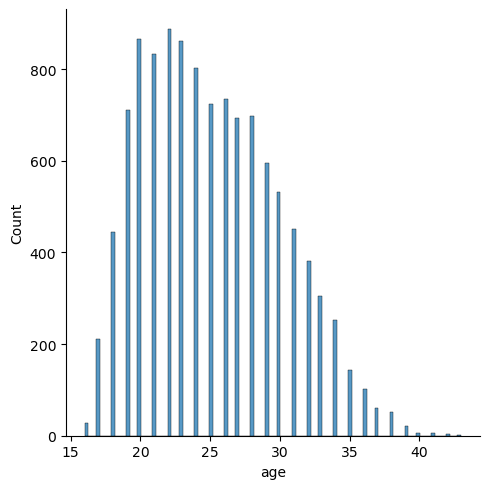

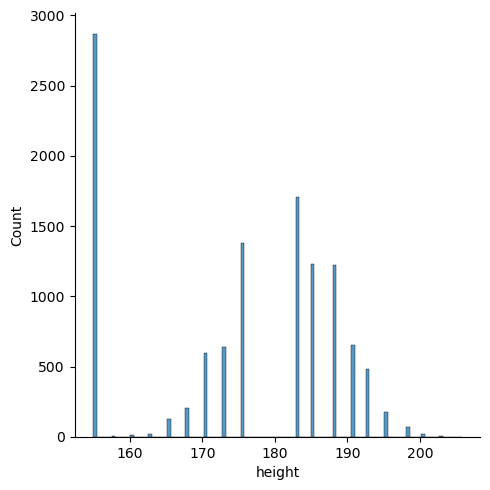

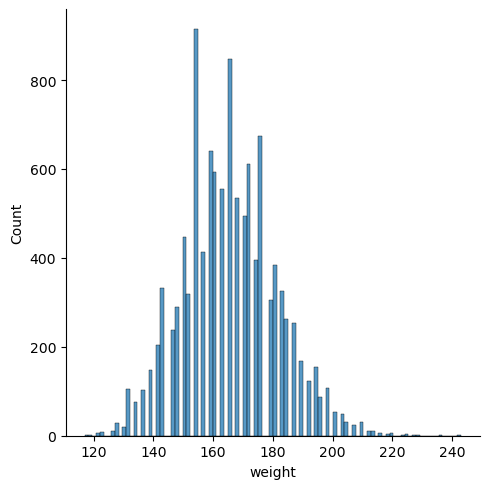

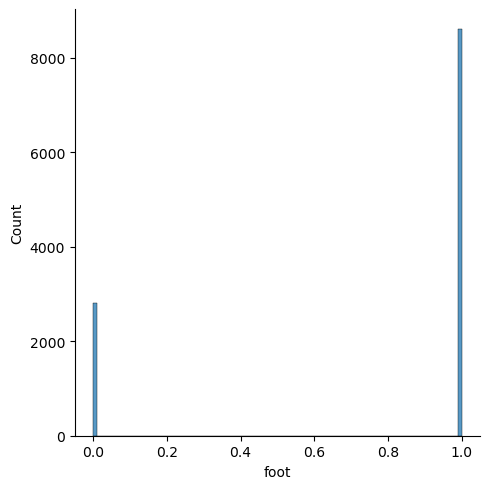

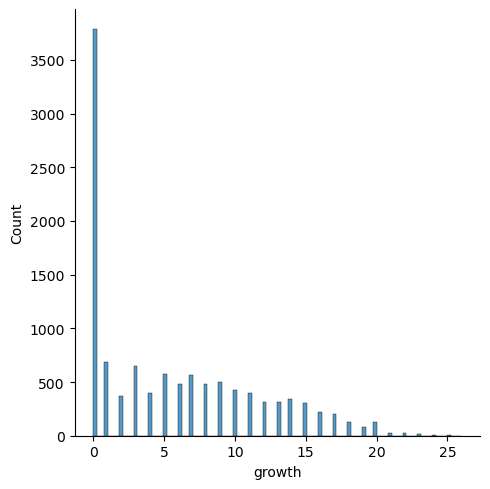

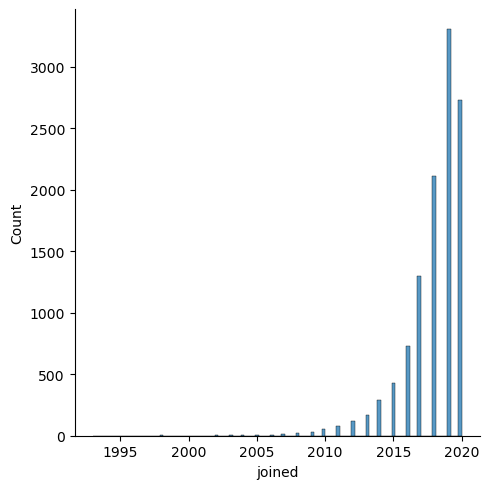

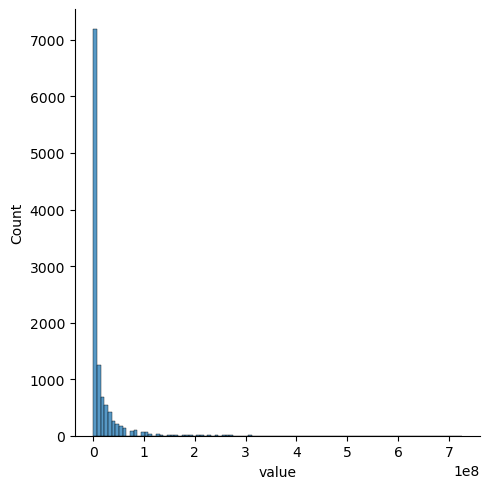

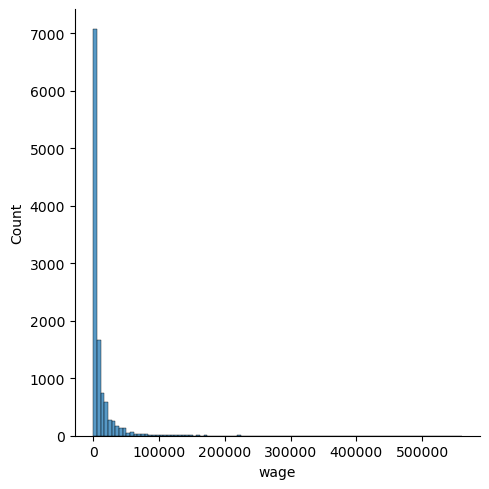

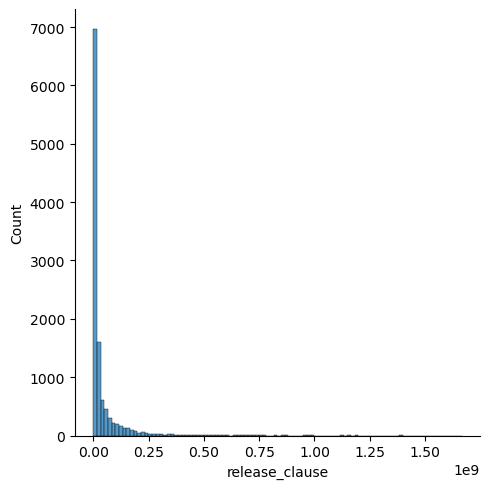

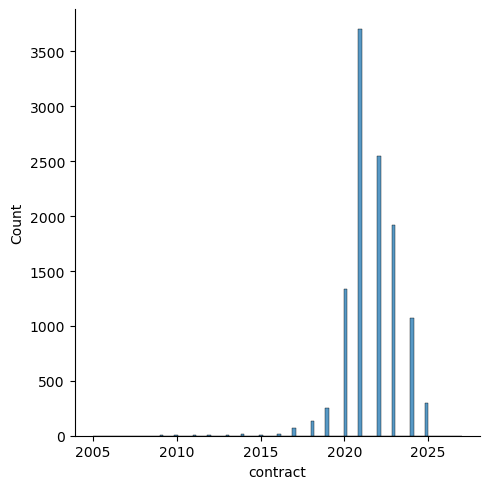

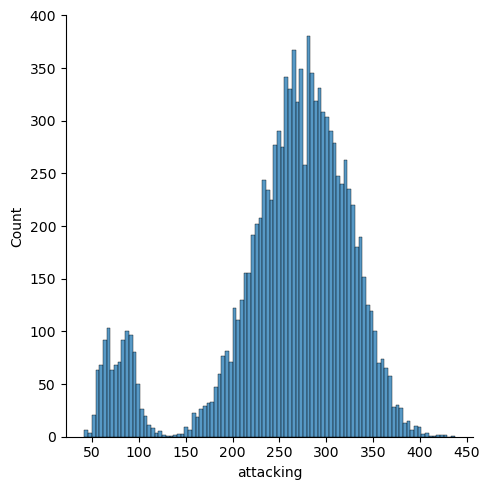

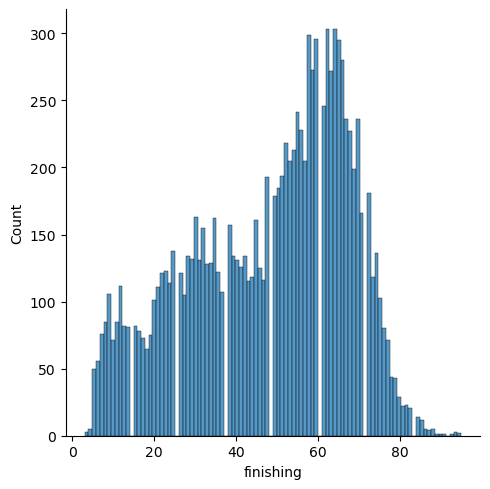

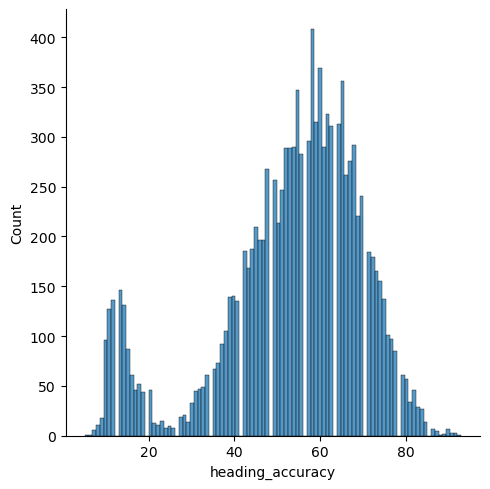

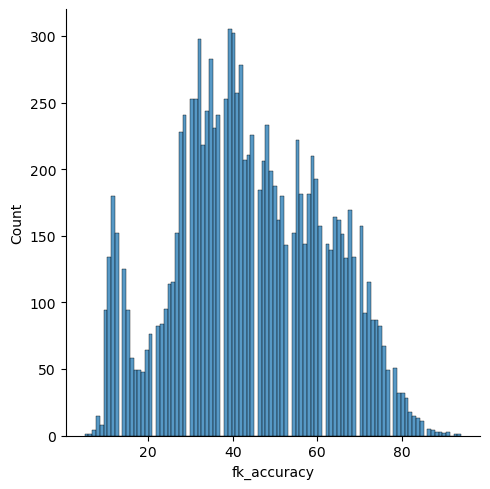

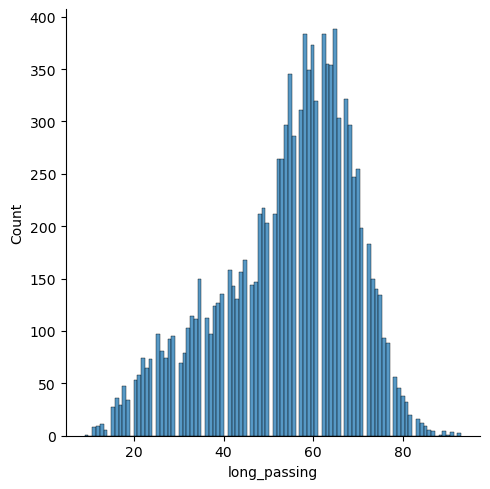

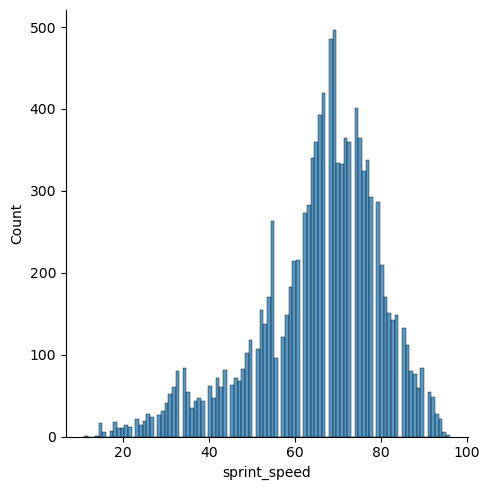

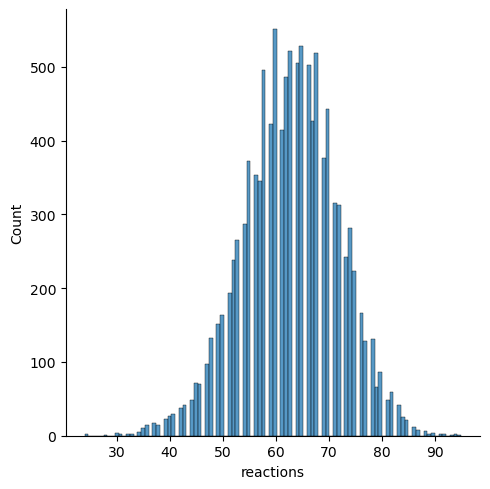

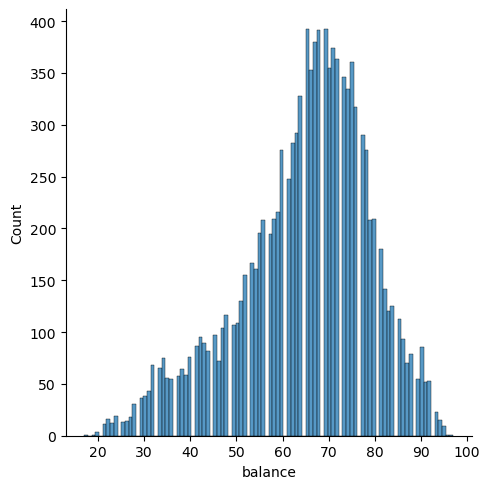

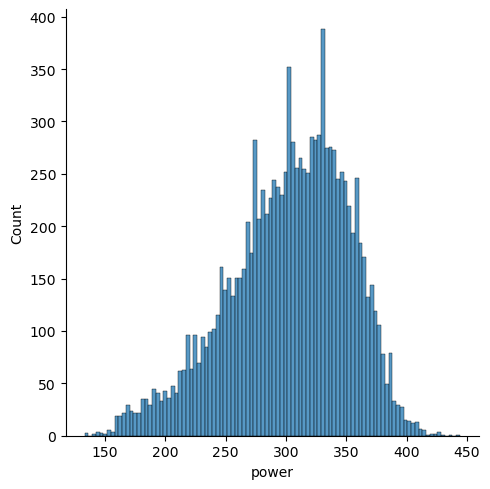

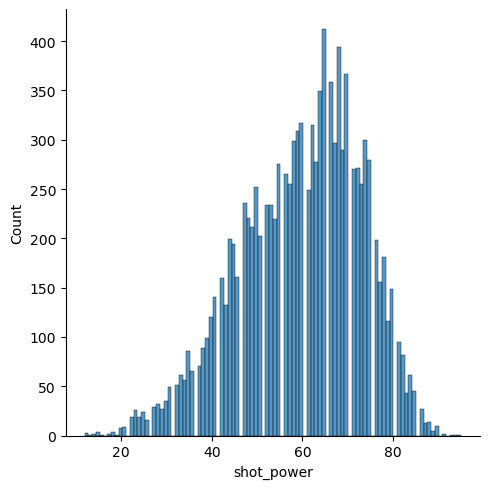

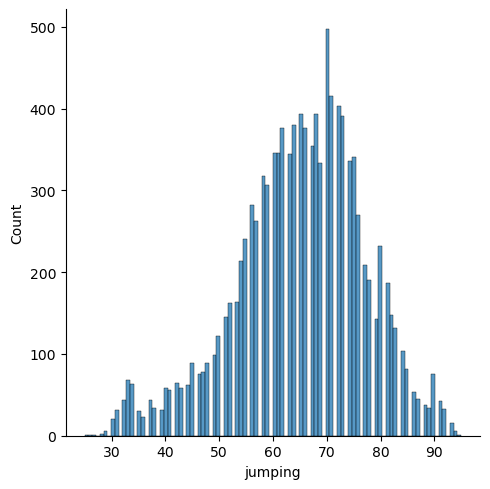

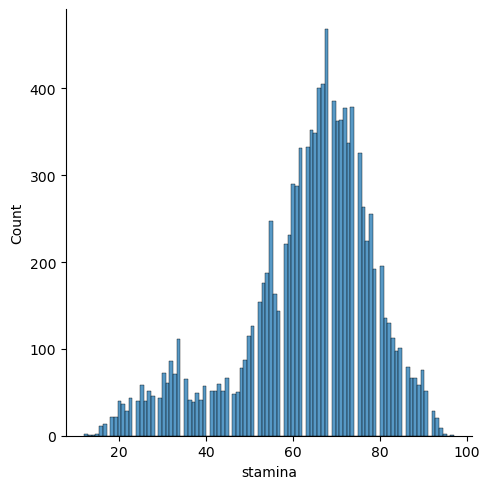

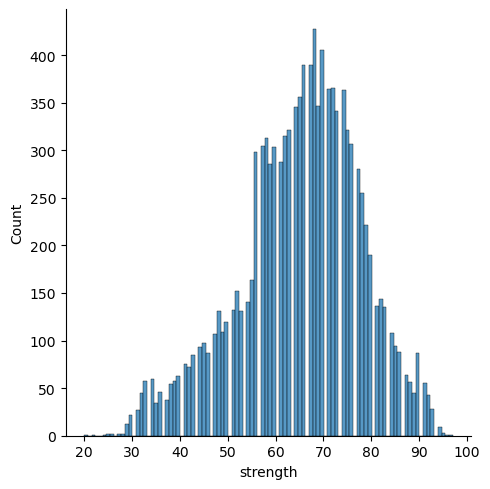

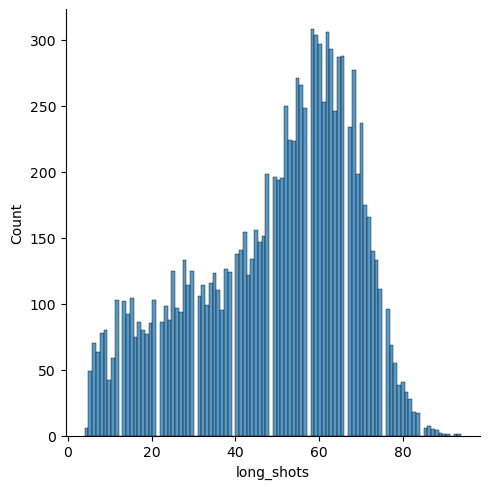

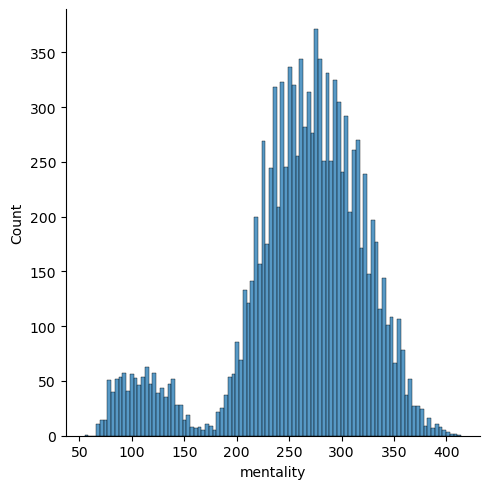

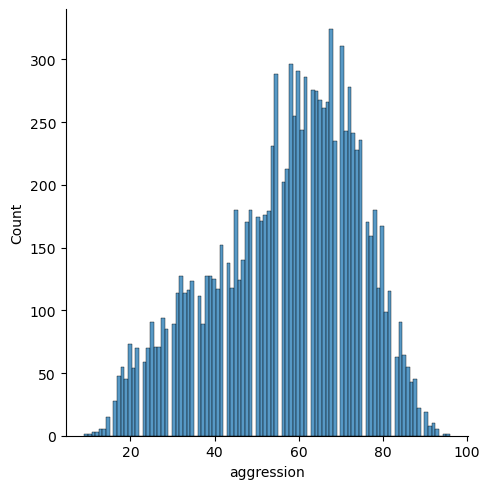

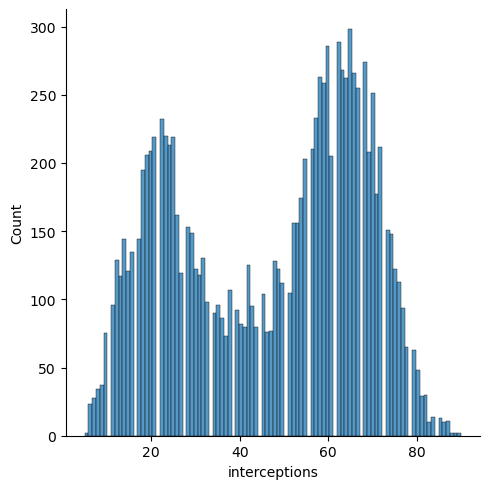

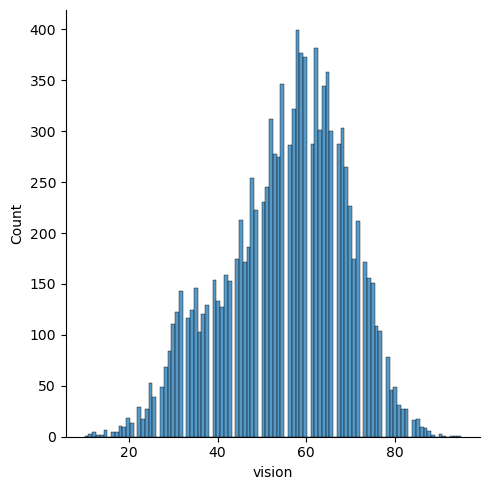

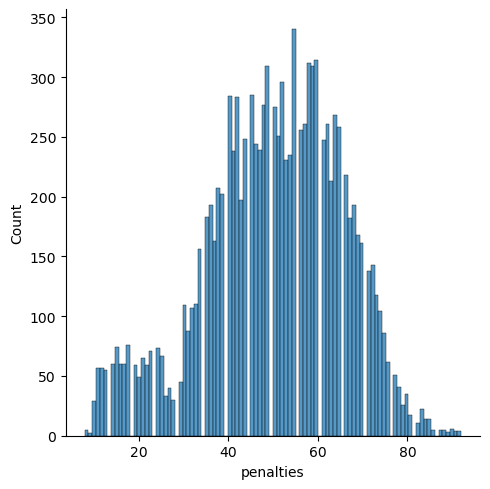

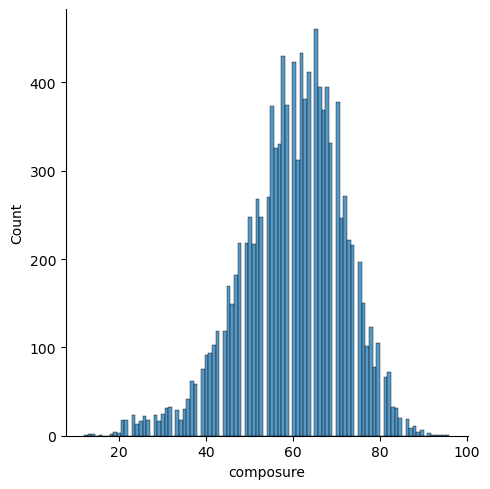

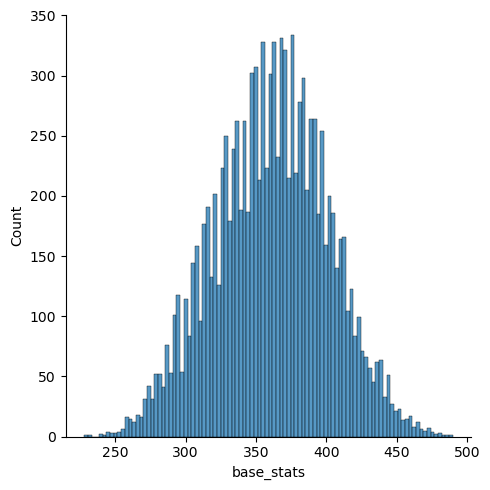

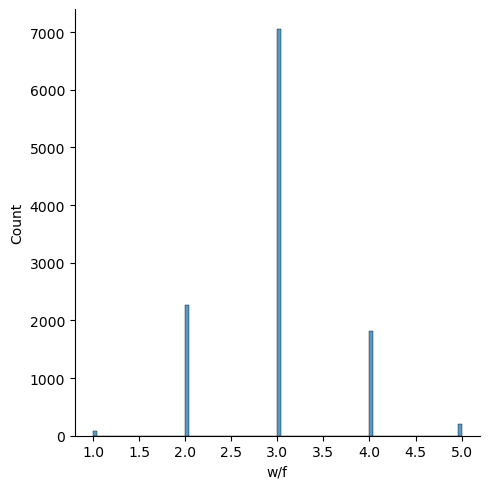

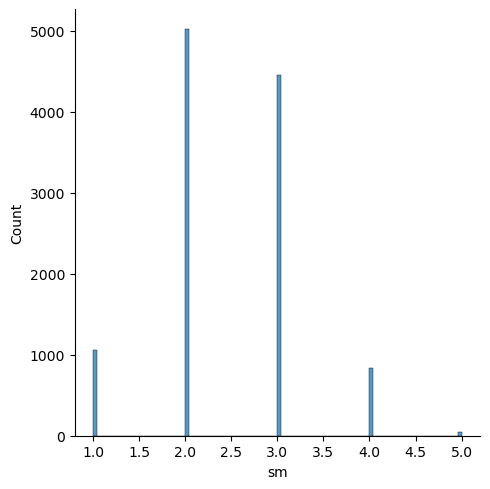

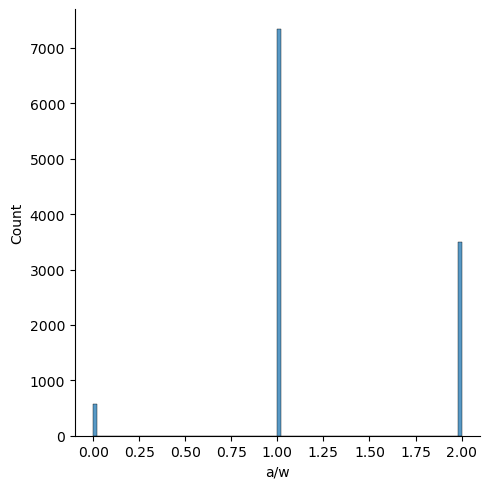

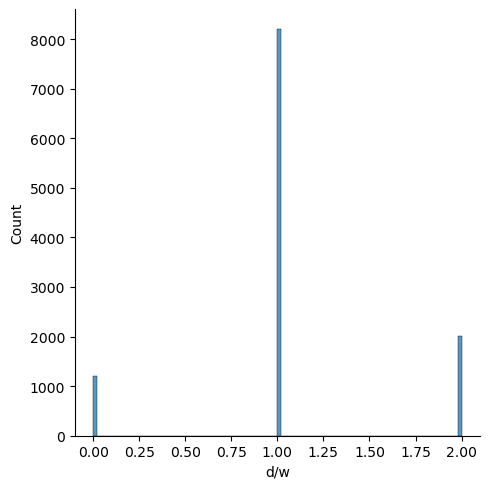

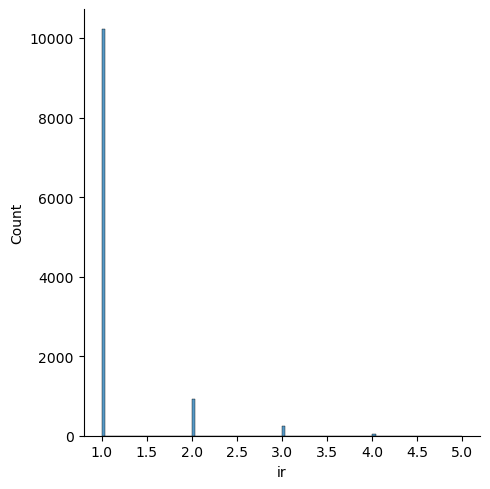

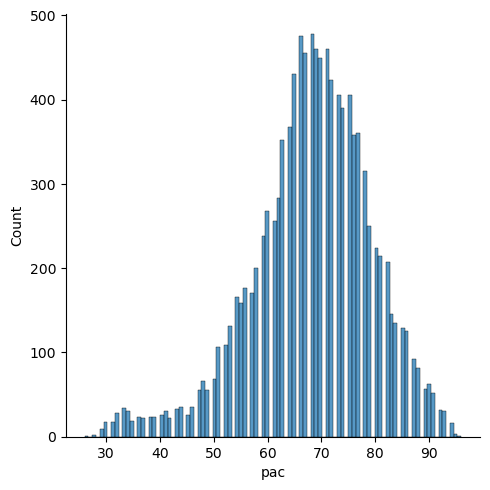

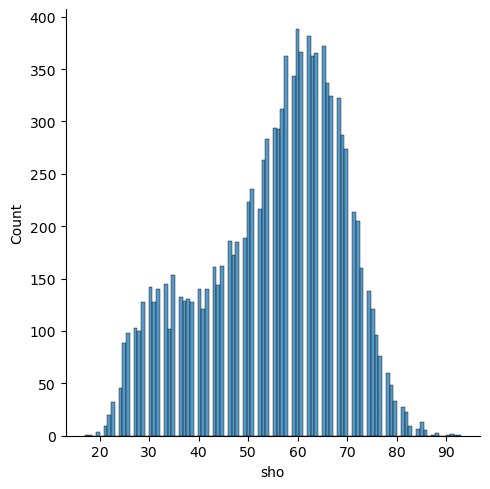

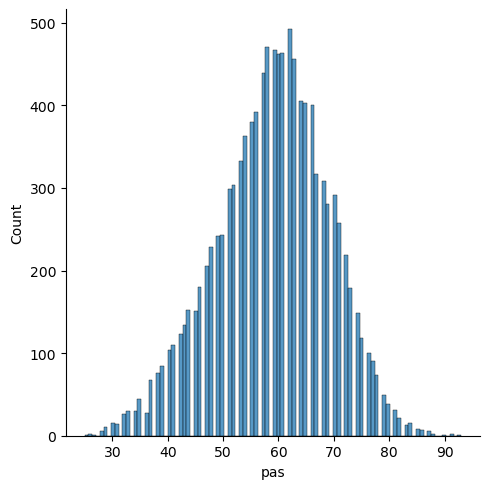

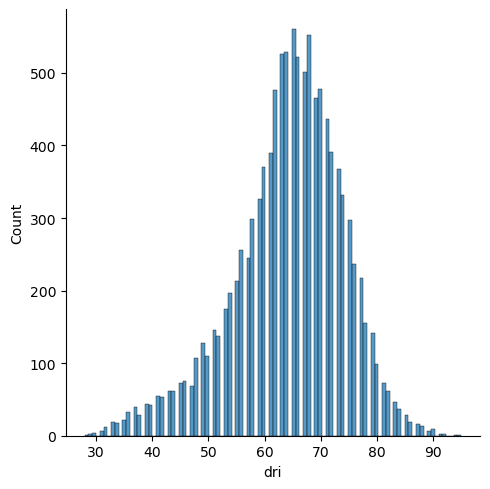

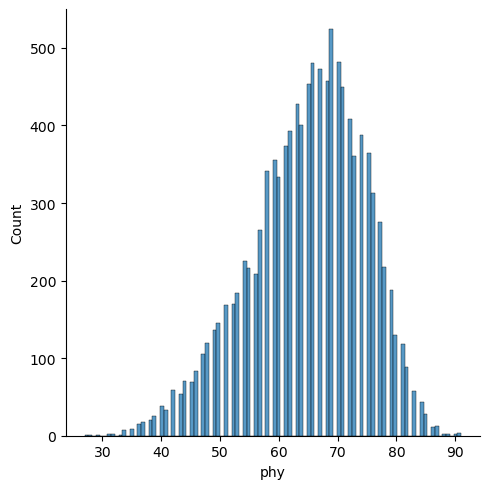

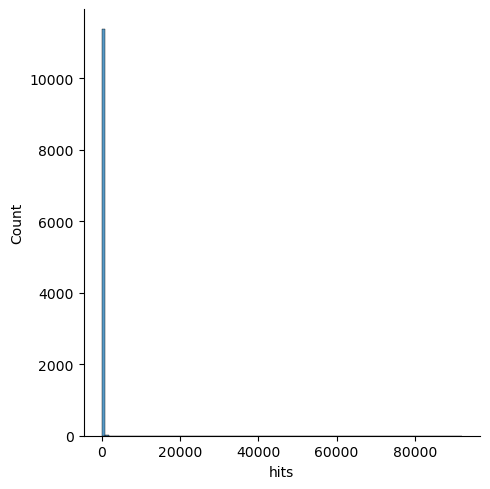

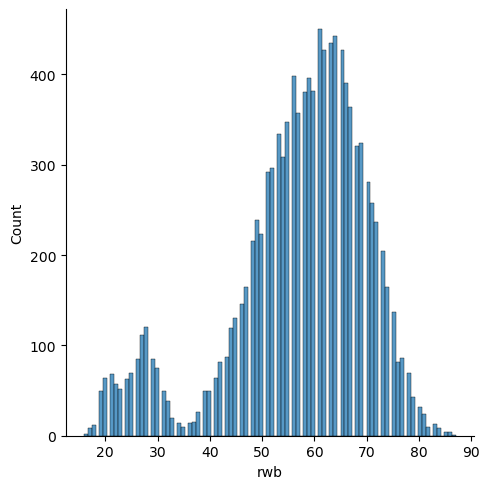

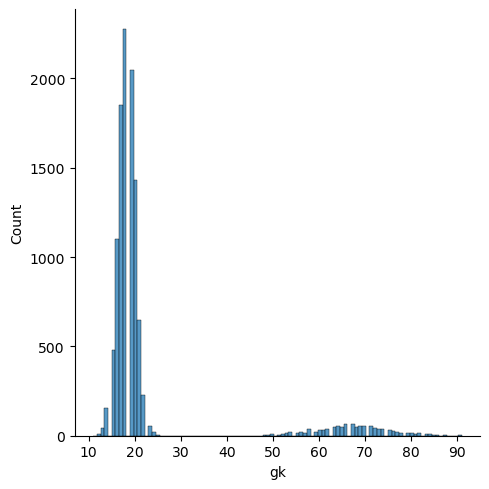

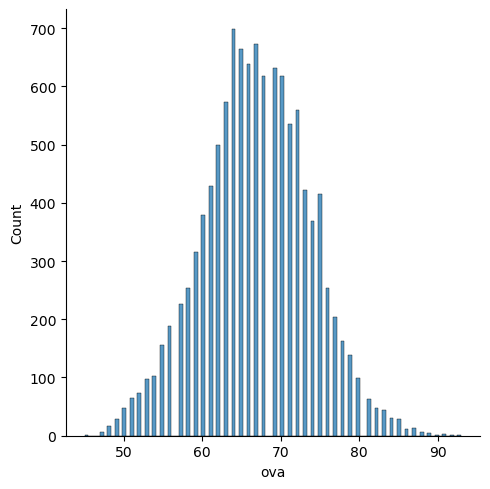

In [43]:
# Inspecting the data visually
import warnings
warnings.filterwarnings('ignore')

for i in numericals.columns:
    sns.displot(numericals[i], bins = 100)
    plt.show()

In [44]:
dfmodel = pd.concat([categoricals, numericals], axis=1)

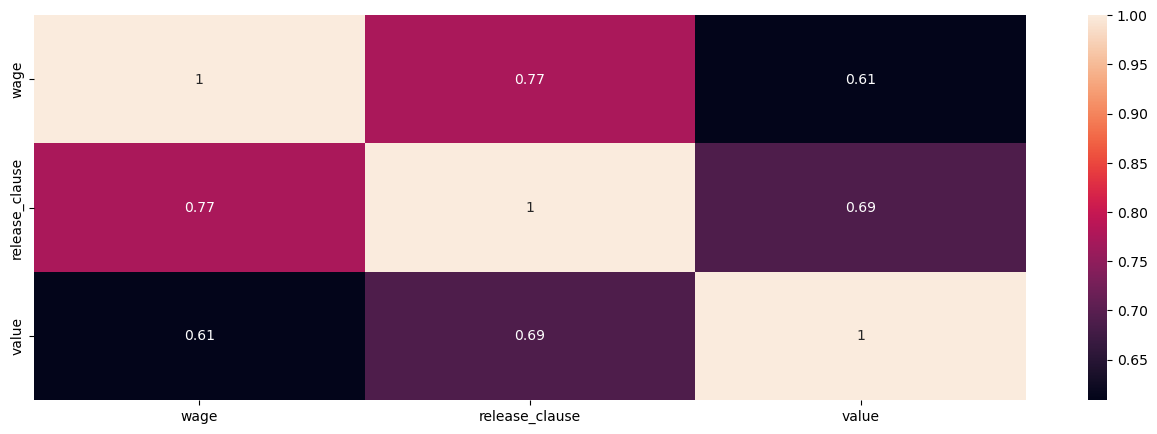

In [45]:
# We see close correlation between wage, release clause, value. We check for collinearity
correlations_matrix = dfmodel[['wage','release_clause','value']].corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# We decide agains dropping them

In [46]:
print(numericals.shape)
# Removing outliers
# Replacing heigh with an average
mean = df['height'].mean()
def insertmean(a):
    if a < 160:
        a = mean
    return a
dfmodel['height'] = dfmodel['height'].map(insertmean)

(11411, 45)


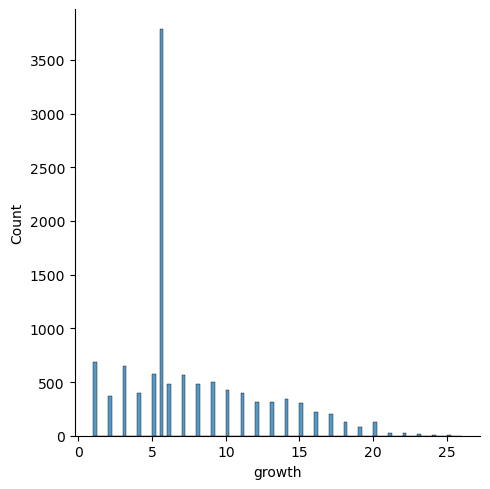

In [47]:
# Replacing growth with an average
mean = dfmodel['growth'].mean()
def insertmean_growth(a):
    if a == 0:
        a = mean
    return a
dfmodel['growth'] = dfmodel['growth'].map(insertmean_growth)
sns.displot(dfmodel['growth'], bins = 100)
plt.show()

In [48]:
dfmodel['value'].value_counts()

11000000     372
12000000     256
1000000      232
325000       231
0            230
450000       226
13000000     209
275000       207
475000       206
550000       198
650000       194
350000       192
525000       189
575000       178
375000       177
300000       177
400000       174
425000       171
14000000     170
625000       164
500000       161
750000       161
55000000     159
800000       156
675000       148
900000       145
600000       143
15000000     141
18000000     135
65000000     133
925000       126
775000       123
250000       116
8000000      113
16000000     113
725000       113
160000       110
875000       109
850000       106
6000000      102
7000000      101
85000000     100
130000        99
2000000       99
170000        99
950000        98
700000        98
19000000      97
825000        97
24000000      96
17000000      94
180000        93
27000000      91
31000000      89
21000000      89
190000        89
210000        88
200000        87
220000        

In [49]:
print(dfmodel.shape)
# We only have 230 outliers with 0 value, so we drop them
dfmodel = dfmodel[(numericals['value']>0)]
print(dfmodel.shape)

(11411, 49)
(11181, 49)


In [50]:
dfmodel['wage'].value_counts()
# The values in wage don't lokk like outliers but distributed among several small values, we decide to leave them be as is

2000      1585
500       1205
3000      1160
1000       904
4000       735
5000       572
6000       435
7000       323
8000       304
9000       252
10000      190
15000      181
12000      170
11000      164
13000      159
20000      138
14000      138
18000      105
16000      100
17000       96
900         94
21000       93
19000       82
650         78
30000       77
950         76
800         76
750         75
700         73
850         71
600         71
22000       71
26000       63
550         63
24000       59
25000       56
23000       54
27000       48
29000       44
40000       41
28000       37
34000       35
37000       34
50000       34
36000       32
32000       31
33000       30
31000       30
38000       27
35000       27
42000       25
44000       22
41000       22
48000       22
47000       20
45000       20
46000       19
55000       18
43000       18
49000       15
39000       15
59000       13
57000       13
54000       12
69000       11
60000       11
51000     

In [51]:
dfmodel['release_clause'].value_counts()
# We also decide to let release clause as it is because out model otherwise wouldn't work for players without a release clause

0             714
11000000      383
12000000      305
13000000      302
14000000      262
             ... 
1665000000      1
819000000       1
354000000       1
349000000       1
262000000       1
Name: release_clause, Length: 1060, dtype: int64

In [52]:
dfmodel.columns

Index(['nationality', 'club', 'bp', 'position', 'age', 'height', 'weight',
       'foot', 'growth', 'joined', 'value', 'wage', 'release_clause',
       'contract', 'attacking', 'finishing', 'heading_accuracy', 'fk_accuracy',
       'long_passing', 'sprint_speed', 'reactions', 'balance', 'power',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'vision', 'penalties',
       'composure', 'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac',
       'sho', 'pas', 'dri', 'phy', 'hits', 'rwb', 'gk', 'ova'],
      dtype='object')

In [53]:
# Since we have huge differences in the absolute values, most are in then two-digits and we have money values in the millions,
# we try to relativate them iwth logarhitmic scaling
# log10 transformation
def log_transfom_clean(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

dfmodel['value'] = dfmodel['value'].apply(log_transfom_clean)
dfmodel['wage'] = dfmodel['wage'].apply(log_transfom_clean)
dfmodel['release_clause'] = dfmodel['release_clause'].apply(log_transfom_clean)
dfmodel.head(3)
dfmodel.isna().sum()

nationality         0
club                0
bp                  0
position            0
age                 0
height              0
weight              0
foot                0
growth              0
joined              0
value               0
wage                0
release_clause      0
contract            0
attacking           0
finishing           0
heading_accuracy    0
fk_accuracy         0
long_passing        0
sprint_speed        0
reactions           0
balance             0
power               0
shot_power          0
jumping             0
stamina             0
strength            0
long_shots          0
mentality           0
aggression          0
interceptions       0
vision              0
penalties           0
composure           0
base_stats          0
w/f                 0
sm                  0
a/w                 0
d/w                 0
ir                  0
pac                 0
sho                 0
pas                 0
dri                 0
phy                 0
hits      

# Linear regression model

In [54]:
# dfmodel = pd.concat([categoricals, numericals], axis=1)

In [55]:
# The function takes (a dataframe, a target column name, a float for the test_size between 0 and 1)
# It does:
# X-y split
# Num-Cat split for X
# Normalization using MinMax
# OneHotEncoding for Categroricals
# Concatenation
# Creating and training a linear regression model
# Model Validation
# It outputs: (liner_model, a dataframe containing the valuation metrics for the training and test data)

def linear_automodel_MM(df, target, ts):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import OneHotEncoder
    # X-y split
    y = df[target]
    X = df.drop([target], axis=1)
    # Num-Cat split
    X_num = X.select_dtypes('number')
    X_cat = X.select_dtypes('object')
    # MinMaxScaling
    transformer = MinMaxScaler().fit(X_num)
    X_normalized = transformer.transform(X_num)
    
    # OneHotEncoding
    encoder = OneHotEncoder(drop='first').fit(X_cat)
    encoded = encoder.transform(X_cat).toarray()
    # Putting into dataframes
    onehot_encoded = pd.DataFrame(encoded)
    X_normalized = pd.DataFrame(X_normalized)
    X = pd.concat([X_normalized, onehot_encoded], axis=1)
    # Creating the linear regression model
    # Train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)
    # Training the Linear Regression model with our data
    from sklearn import linear_model
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    
    # Validating Model
    # Training Data
    # R2-Score
    from sklearn.metrics import r2_score, mean_absolute_error
    predictions = lm.predict(X_train)
    r2score = round(r2_score(y_train, predictions),2)
    
    # Mean Square Error
    from sklearn.metrics import mean_squared_error
    mse=round(mean_squared_error(y_train,predictions),2)
    
    # Root Mean Square Error
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error
    mae = mean_absolute_error(y_train, predictions)
    
    # Test Data
    
    # R2-Score
    predictions = lm.predict(X_test)
    r2scoret = r2_score(y_test, predictions)
    
    # Mean Square Error
    mset=mean_squared_error(y_test,predictions)
    
    # Root Mean Square Error
    rmset = np.sqrt(mse)
    
    # Mean Absolute Error
    maet = mean_absolute_error(y_test, predictions)
    
    # Creating the output dataframe
    df_val = pd.DataFrame({'ValType': ['Train', 'Test'], 'R2-Score': [r2score, r2scoret], 'MSE': [mse, mset] , 'RMSE': [rmse, rmset], 'MAE': [mae, maet]})
    
    # returning the model and the validation
    return lm, df_val
    

In [56]:
lm,val = linear_automodel_MM(dfmodel, 'ova', 0.3)
display(val)

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.700000e-01,1.610000e+00,1.268858,9.754210e-01
1,Test,-1.267079e+20,5.983417e+21,1.268858,5.784931e+09


## Eliminating additional multicollinearity

In [57]:
# We see that we did not sufficiently eliminated multicollinearity by hand, so we try to do it systematically with a threshhold

In [58]:
# We split away our target
yframe = dfmodel['ova']
xframe = dfmodel.drop(['ova'], axis=1) 
# Create correlation matrix
corr_matrix = xframe.corr()
corr_matrix = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
xframe.drop(to_drop, axis=1, inplace=True)


In [59]:
# We reconcatenate the xframe and yframe
dfmodel = pd.concat([yframe, xframe], axis=1)
dfmodel.head(3)

,ova,nationality,club,bp,position,age,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,heading_accuracy,fk_accuracy,long_passing,sprint_speed,reactions,balance,power,shot_power,jumping,stamina,strength,aggression,interceptions,vision,penalties,composure,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,dri,phy,hits,gk
0,64,Switzerland,FC Lausanne-Sport,CM,CM CDM,26,175.26,161,1,1.000000,2015,5.720159,3.602060,5.903633,2020,258,43,55,63,73,66,82.0,306,62,73.0,71,55,54,52.0,68.0,54,54.0,357,4,2,2,1,1,69,51,63,60,3,16
1,77,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,30,182.88,159,1,5.596968,2015,7.929419,4.361728,0.000000,2020,365,76,72,63,83,75,75.0,372,74,81.0,75,74,54,33.0,72.0,76,70.0,412,3,4,2,0,2,83,75,82,71,44,20
2,80,Italy,Al Hilal,CAM,CAM CF,33,162.56,134,1,5.596968,2019,6.954243,4.690196,8.184691,2022,336,34,91,74,76,78,93.0,308,79,34.0,75,42,75,26.0,78.0,73,82.0,404,4,4,2,1,2,80,77,86,56,73,14


In [60]:
# We test our model again
lm,val = linear_automodel_MM(dfmodel, 'ova', 0.2)
display(val)

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.690000e+00,1.3,1.002258e+00
1,Test,-8.672037e+20,4.171133e+22,1.3,2.309921e+10


In [61]:
# We see if any one column damages our model
for c in dfmodel.columns:
    if c != 'ova':
        dtest = dfmodel.copy()
        dtest = dtest.drop([c], axis=1)
        lm, validation = linear_automodel_MM(dtest,'ova',0.3)
        print('Results for dropping ' + c)
        display(validation)
# We test our model again
lm,val = linear_automodel_MM(dfmodel, 'ova', 0.2)
display(val)

Results for dropping nationality


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.710000e+00,1.30767,1.009730e+00
1,Test,-1.465429e+21,6.920071e+22,1.30767,1.601365e+10


Results for dropping club


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,2.100000e+00,1.449138,1.125739e+00
1,Test,-3.331120e+20,1.573027e+22,1.449138,8.608378e+09


Results for dropping bp


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.680000e+00,1.296148,1.001834e+00
1,Test,-6.059471e+21,2.861412e+23,1.296148,4.890987e+10


Results for dropping position


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.980000e+00,1.407125,1.098116e+00
1,Test,-3.636736e+20,1.717345e+22,1.407125,7.523961e+09


Results for dropping age


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.660000e+00,1.28841,9.897322e-01
1,Test,-1.181678e+23,5.580137e+24,1.28841,1.777121e+11


Results for dropping height


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.863729e-01
1,Test,-1.107561e+22,5.230140e+23,1.280625,5.145812e+10


Results for dropping weight


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.867901e-01
1,Test,-7.744211e+22,3.656982e+24,1.280625,1.193476e+11


Results for dropping foot


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.876325e-01
1,Test,-2.452154e+23,1.157960e+25,1.280625,2.365607e+11


Results for dropping growth


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.670000e+00,1.292285,9.921687e-01
1,Test,-1.894928e+21,8.948254e+22,1.292285,1.909927e+10


Results for dropping joined


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.877236e-01
1,Test,-1.717848e+23,8.112048e+24,1.284523,1.704963e+11


Results for dropping value


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.990000e+00,1.410674,1.071837e+00
1,Test,-1.039397e+23,4.908257e+24,1.410674,1.438458e+11


Results for dropping wage


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.780000e+00,1.334166,1.035861e+00
1,Test,-2.528885e+21,1.194194e+23,1.334166,1.940342e+10


Results for dropping release_clause


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.899123e-01
1,Test,-2.567561e+23,1.212458e+25,1.284523,2.047119e+11


Results for dropping contract


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.875689e-01
1,Test,-8.513320e+22,4.020172e+24,1.284523,1.170852e+11


Results for dropping attacking


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.866213e-01
1,Test,-4.430396e+22,2.092128e+24,1.280625,1.103768e+11


Results for dropping heading_accuracy


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.660000e+00,1.28841,9.897434e-01
1,Test,-4.767789e+22,2.251452e+24,1.28841,1.212398e+11


Results for dropping fk_accuracy


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.871725e-01
1,Test,-1.108618e+23,5.235133e+24,1.280625,1.508603e+11


Results for dropping long_passing


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.864926e-01
1,Test,-9.719362e+21,4.589691e+23,1.280625,4.847118e+10


Results for dropping sprint_speed


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.903464e-01
1,Test,-4.035390e+21,1.905598e+23,1.284523,3.069644e+10


Results for dropping reactions


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.830000e+00,1.352775,1.046785e+00
1,Test,-2.217278e+23,1.047046e+25,1.352775,2.315149e+11


Results for dropping balance


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.872836e-01
1,Test,-2.721730e+22,1.285259e+24,1.284523,7.337940e+10


Results for dropping power


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.881706e-01
1,Test,-1.094981e+23,5.170736e+24,1.284523,1.299112e+11


Results for dropping shot_power


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.874936e-01
1,Test,-2.741255e+23,1.294480e+25,1.280625,2.108180e+11


Results for dropping jumping


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.882238e-01
1,Test,-4.117664e+23,1.944449e+25,1.280625,3.511376e+11


Results for dropping stamina


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.876516e-01
1,Test,-1.534039e+23,7.244060e+24,1.280625,1.596205e+11


Results for dropping strength


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.868467e-01
1,Test,-9.974594e+22,4.710217e+24,1.280625,1.554641e+11


Results for dropping aggression


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.660000e+00,1.28841,9.943821e-01
1,Test,-1.608037e+22,7.593496e+23,1.28841,8.252808e+10


Results for dropping interceptions


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.880760e-01
1,Test,-5.866384e+22,2.770232e+24,1.284523,1.333149e+11


Results for dropping vision


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.891766e-01
1,Test,-5.496638e+21,2.595630e+23,1.284523,3.139104e+10


Results for dropping penalties


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.867327e-01
1,Test,-4.663057e+22,2.201995e+24,1.280625,8.966654e+10


Results for dropping composure


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.690000e+00,1.3,9.977557e-01
1,Test,-1.610123e+23,7.603348e+24,1.3,2.182734e+11


Results for dropping base_stats


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.690000e+00,1.3,1.002641e+00
1,Test,-2.655842e+22,1.254145e+24,1.3,7.893388e+10


Results for dropping w/f


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.892019e-01
1,Test,-3.954138e+23,1.867229e+25,1.284523,2.266235e+11


Results for dropping sm


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.873620e-01
1,Test,-3.599296e+22,1.699665e+24,1.284523,1.015611e+11


Results for dropping a/w


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.866757e-01
1,Test,-3.235857e+21,1.528041e+23,1.280625,2.372078e+10


Results for dropping d/w


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.868295e-01
1,Test,-4.484983e+22,2.117905e+24,1.280625,8.737635e+10


Results for dropping ir


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.700000e+00,1.30384,1.003816e+00
1,Test,-3.911283e+22,1.846992e+24,1.30384,1.091760e+11


Results for dropping pac


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.864343e-01
1,Test,-8.297420e+21,3.918220e+23,1.280625,4.451154e+10


Results for dropping sho


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.640000e+00,1.280625,9.865247e-01
1,Test,-2.867830e+22,1.354251e+24,1.280625,8.359624e+10


Results for dropping dri


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.670000e+00,1.292285,9.933067e-01
1,Test,-2.439272e+21,1.151877e+23,1.292285,2.567780e+10


Results for dropping phy


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.875121e-01
1,Test,-1.146293e+22,5.413041e+23,1.284523,5.150089e+10


Results for dropping hits


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.892585e-01
1,Test,-1.792610e+22,8.465091e+23,1.284523,6.449312e+10


Results for dropping gk


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.650000e+00,1.284523,9.883012e-01
1,Test,-3.972036e+22,1.875681e+24,1.284523,1.017102e+11


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.600000e-01,1.690000e+00,1.3,1.002258e+00
1,Test,-8.672037e+20,4.171133e+22,1.3,2.309921e+10


In [62]:
# We delete all columns that make our model worse
dfmodel2 = dfmodel.copy()
dfmodel2 = dfmodel2.drop(['club','position','growth'], axis=1) 

In [63]:
# We see if any more columns damage our model
for c in dfmodel2.columns:
    if c != 'ova':
        dtest = dfmodel2.copy()
        dtest = dtest.drop([c], axis=1)
        lm, validation = linear_automodel_MM(dtest,'ova',0.3)
        print('Results for dropping ' + c)
        display(validation) 

Results for dropping nationality


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.940000,2.810000,1.676305,1.324344
1,Test,0.936751,2.986733,1.676305,1.365931


Results for dropping bp


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.820000e+00,1.679286,1.324944e+00
1,Test,-4.662957e+22,2.201948e+24,1.679286,4.722552e+10


Results for dropping age


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.790000e+00,1.670329,1.314194e+00
1,Test,-2.564570e+21,1.211045e+23,1.670329,1.070743e+10


Results for dropping height


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.580000e+00,1.606238,1.269489e+00
1,Test,-6.575711e+21,3.105192e+23,1.606238,1.865592e+10


Results for dropping weight


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.273586e+00
1,Test,-1.712926e+23,8.088802e+24,1.609348,9.310985e+10


Results for dropping foot


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.271610e+00
1,Test,-1.499853e+22,7.082627e+23,1.609348,2.303617e+10


Results for dropping joined


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.610000e+00,1.615549,1.276752e+00
1,Test,-3.813041e+22,1.800600e+24,1.615549,4.090836e+10


Results for dropping value


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.300000e-01,3.500000e+00,1.870829,1.464051e+00
1,Test,-4.312446e+22,2.036429e+24,1.870829,4.852764e+10


Results for dropping wage


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.760000e+00,1.661325,1.311061e+00
1,Test,-3.985864e+22,1.882210e+24,1.661325,3.971940e+10


Results for dropping release_clause


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.640000e+00,1.624808,1.286093e+00
1,Test,-1.180392e+23,5.574064e+24,1.624808,7.320123e+10


Results for dropping contract


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.270685e+00
1,Test,-9.080547e+21,4.288029e+23,1.609348,1.843241e+10


Results for dropping attacking


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.580000e+00,1.606238,1.269681e+00
1,Test,-1.056844e+23,4.990643e+24,1.606238,5.839128e+10


Results for dropping heading_accuracy


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.600000e+00,1.612452,1.274275e+00
1,Test,-4.632969e+21,2.187787e+23,1.612452,1.581595e+10


Results for dropping fk_accuracy


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.580000e+00,1.606238,1.270403e+00
1,Test,-5.457667e+21,2.577228e+23,1.606238,1.458364e+10


Results for dropping long_passing


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.620000e+00,1.618641,1.277625e+00
1,Test,-6.253429e+22,2.953003e+24,1.618641,4.374949e+10


Results for dropping sprint_speed


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.272459e+00
1,Test,-1.174230e+22,5.544968e+23,1.609348,2.497403e+10


Results for dropping reactions


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.930000e+00,1.711724,1.345094e+00
1,Test,-8.798608e+19,4.154891e+21,1.711724,2.282464e+09


Results for dropping balance


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.269251e+00
1,Test,-1.350099e+21,6.375459e+22,1.609348,7.992158e+09


Results for dropping power


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.271470e+00
1,Test,-3.957358e+21,1.868749e+23,1.609348,1.404849e+10


Results for dropping shot_power


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.270041e+00
1,Test,-5.258448e+20,2.483152e+22,1.609348,5.443754e+09


Results for dropping jumping


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.610000e+00,1.615549,1.276891e+00
1,Test,-1.482191e+22,6.999223e+23,1.615549,2.727047e+10


Results for dropping stamina


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.580000e+00,1.606238,1.269878e+00
1,Test,-1.694851e+20,8.003452e+21,1.606238,2.682582e+09


Results for dropping strength


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.270777e+00
1,Test,-8.701603e+21,4.109084e+23,1.609348,2.269992e+10


Results for dropping aggression


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.271463e+00
1,Test,-7.842618e+21,3.703453e+23,1.609348,1.893129e+10


Results for dropping interceptions


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.620000e+00,1.618641,1.278138e+00
1,Test,-8.699622e+22,4.108148e+24,1.618641,5.734326e+10


Results for dropping vision


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.600000e+00,1.612452,1.273376e+00
1,Test,-1.264762e+22,5.972480e+23,1.612452,2.652684e+10


Results for dropping penalties


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.271884e+00
1,Test,-3.194049e+22,1.508299e+24,1.609348,3.766605e+10


Results for dropping composure


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.660000e+00,1.630951,1.281278e+00
1,Test,-3.415879e+22,1.613051e+24,1.630951,3.360971e+10


Results for dropping base_stats


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.630000e+00,1.621727,1.281527e+00
1,Test,-6.810349e+22,3.215993e+24,1.621727,6.268347e+10


Results for dropping w/f


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.271657e+00
1,Test,-1.898670e+22,8.965925e+23,1.609348,2.864835e+10


Results for dropping sm


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.600000e+00,1.612452,1.274322e+00
1,Test,-3.799900e+22,1.794394e+24,1.612452,3.937550e+10


Results for dropping a/w


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.273370e+00
1,Test,-1.426570e+22,6.736571e+23,1.609348,2.790428e+10


Results for dropping d/w


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.270276e+00
1,Test,-1.251182e+22,5.908349e+23,1.609348,2.594470e+10


Results for dropping ir


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.660000e+00,1.630951,1.289347e+00
1,Test,-4.885222e+22,2.306907e+24,1.630951,5.305844e+10


Results for dropping pac


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.270628e+00
1,Test,-9.699120e+21,4.580132e+23,1.609348,2.349048e+10


Results for dropping sho


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.610000e+00,1.615549,1.277142e+00
1,Test,-1.608199e+22,7.594260e+23,1.615549,2.504964e+10


Results for dropping dri


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.620000e+00,1.618641,1.279176e+00
1,Test,-7.651482e+19,3.613194e+21,1.618641,1.768799e+09


Results for dropping phy


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.272179e+00
1,Test,-2.514541e+22,1.187420e+24,1.609348,2.472129e+10


Results for dropping hits


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.600000e+00,1.612452,1.272172e+00
1,Test,-5.655573e+21,2.670683e+23,1.612452,1.798185e+10


Results for dropping gk


,ValType,R2-Score,MSE,RMSE,MAE
0,Train,9.400000e-01,2.590000e+00,1.609348,1.273456e+00
1,Test,-1.314552e+22,6.207596e+23,1.609348,1.688260e+10


In [64]:
# We drop nationality
dfmodel2 = dfmodel2.drop(['nationality'], axis=1) 

In [65]:
# We test our model again 
lm,val = linear_automodel_MM(dfmodel2, 'ova', 0.2)
display(val)

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.940000,2.830000,1.68226,1.328945
1,Test,0.938343,2.965619,1.68226,1.365085


## Preparation for new data

In [66]:
dfmodel2.columns
pd.set_option('display.max_rows', 2000)
display(dfmodel2['contract'].unique)

<bound method Series.unique of 0        2020
1        2020
2        2022
3        2021
4        2021
         ... 
11695    2021
11696    2021
11697    2022
11698    2024
11700    2020
Name: contract, Length: 11181, dtype: int64>

In [67]:
# We create a cleaning function to process incoming new data
def cleaner(df):
    # Convert it so snake format
    cols = []
    for column in df.columns:
        cols.append(column.lower())
    df.columns = cols
    cols = []
    for column in df.columns:
        cols.append(column.replace(' ','_'))
    df.columns = cols
    
    # We only select the columns we need
    df = df[['ova', 'bp', 'age', 'height', 'weight', 'foot', 'joined', 'value',
       'wage', 'release_clause', 'attacking', 'heading_accuracy',
       'fk_accuracy', 'long_passing', 'sprint_speed', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'aggression',
       'interceptions', 'vision', 'penalties', 'composure', 'base_stats',
       'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'dri', 'phy', 'hits',
       'gk']]
    
    # We drop any duplicates
    df.drop_duplicates(inplace = True)
    
    # We see that the NaN values share the same columns so we drop the according rows
    df = df[df['joined'].isna()==False]
    
    # The remaining NULL valuesa are a small percentage of our dataset, we drop the rest
    df = df[df['composure'].isna()==False]
    df = df[df['a/w'].isna()==False]
    df = df[df['d/w'].isna()==False]
    
    # Transforming height to cm
    def heigh_convert(ht):
        feet = int(ht[0])
        inch = int(ht[2])
        ht = feet*30.48 + inch*2.54
        return ht
    df['height'] = df['height'].map(heigh_convert)
    
    # Converting foot type to 1 and 0
    df['foot'] = df['foot'].map({'Right':1,'Left':0})
    
    # Transforming weight to integers
    def weight_convert(wt):
        wt = wt[0:3]
        wt = int(wt)
        return wt
    df['weight'] = df['weight'].map(weight_convert)
    
    # Removing the star sign from three columns
    cols = ['w/f', 'sm','ir']
    for col in cols:
        df[col] = df[col].map(lambda x: str(x).lstrip('★').rstrip('★')).astype(float)
    df[['w/f', 'sm','ir']] = df[['w/f', 'sm','ir']].astype(int)
    
    # The joined and contract columns have overlapping information, we transform them so that
    # the joined column represent the start of the contract
    # the contract column represents the end of the contract 
    def clause_convert(c):
        c = int(c[-4:])
        return c
    df['joined'] = df['joined'].map(clause_convert)
    
    # Replacing low medium and high with 1,2,3
    df['a/w'] = df['a/w'].map({'Low':0,'Medium':1,'High':2})
    df['d/w'] = df['d/w'].map({'Low':0,'Medium':1,'High':2})
    
    # For the last columns we just add the numbers behind the plus sighn to the score
    def adder(a):
        a = a.split("+")
        a = int(a[0])+int(a[1])
        return a
    df['gk'] = df['gk'].map(adder)
    
    # We convert the money values to integers
    def moneycon(a):
        a = str(a)
        a = a.replace('€','')
        a = a.replace('.','')
        a = a.replace('K','000')
        a = a.replace('M','000000')
        return int(a)
    df['release_clause'] = df['release_clause'].map(moneycon)
    df['value'] = df['value'].map(moneycon)
    df['wage'] = df['wage'].map(moneycon)
    
    # We convert hits to integers
    df['hits'] = df['hits'].map(moneycon)
    
    # Removing outliers
    # Replacing heigh with an average
    mean = df['height'].mean()
    def insertmean(a):
        if a < 160:
            a = mean
        return a
    df['height'] = df['height'].map(insertmean)
    
    # We only have 230 outliers with 0 value, so we drop them
    df.drop(df[df.value == 0].index, inplace=True)
   

 #     Since we have huge differences in the absolute values,
 #     most are in then two-digits and we have money values in the millions,
 #     we try to relativate them iwth logarhitmic scaling
 #     # log10 transformation
    def log_transfom_clean(x):
        x = np.log10(x)
        if np.isfinite(x):
            return x
        else:
            return 0

    df['value'] = df['value'].apply(log_transfom_clean)
    df['wage'] = df['wage'].apply(log_transfom_clean)
    df['release_clause'] = df['release_clause'].apply(log_transfom_clean)
    
    
    return df

In [68]:
# Testing the cleaning function
dftest = pd.read_csv('./Copy of fifa21.csv')

In [69]:
dftest = cleaner(dftest)

In [71]:
lm,val = linear_automodel_MM(dftest, 'ova', 0.2)
display(val)

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.940000,2.840000,1.68523,1.330810
1,Test,0.938008,2.981746,1.68523,1.367572


# Validation with the validation data

In [79]:
# New validation dataframe
dfval = pd.read_csv('./fifa21_validate.csv')
dfval.head(3)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",€975K,€5K,€0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,€1.2M,€3K,€2.2M,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,€120K,€500,€249K,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54


In [80]:
# Cleaning the new data
df = cleaner(dfval)

In [81]:
# Getting our prediction
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# X-y split
y = df['ova']
X = df.drop(['ova'], axis=1)
# Num-Cat split
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')
# MinMaxScaling
transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
    
# OneHotEncoding
encoder = OneHotEncoder(drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
# Putting into dataframes
onehot_encoded = pd.DataFrame(encoded)
X_normalized = pd.DataFrame(X_normalized)
X = pd.concat([X_normalized, onehot_encoded], axis=1)

In [82]:
# Putting it in the predictions
predictionsp = lm.predict(X)
predictionsp

array([63.28006858, 66.62842763, 52.54088776, ..., 72.6375178 ,
       62.47451854, 59.36107498])

In [83]:
print(sum(predictionsp))
print(predictionsp.mean())

126566.32004513308
65.95430955973588


In [84]:
# Validating the model with the validation metrics

In [98]:
    # Validating Model
    # Training Data
    # R2-Score
    from sklearn.metrics import r2_score, mean_absolute_error
    # Test Data
    
    # R2-Score
    predictions = lm.predict(X)
    r2scoret = r2_score(y, predictions)
    
    # Mean Square Error
    mset=mean_squared_error(y,predictions)
    
    # Root Mean Square Error
    rmset = np.sqrt(mset)
    rmset = rmset
    
    # Mean Absolute Error
    maet = mean_absolute_error(y, predictions)
    
    # Creating the output dataframe
    df_val = pd.DataFrame({'ValType': ['Validation'], 'R2-Score': [r2scoret], 'MSE': [mset] , 'RMSE': [rmset], 'MAE': [maet]})
    display(df_val)

,ValType,R2-Score,MSE,RMSE,MAE
0,Validation,0.911303,4.030087,2.007508,1.612189


In [99]:
# For comparison:
lm,val = linear_automodel_MM(dftest, 'ova', 0.2)
display(val)

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.940000,2.840000,1.68523,1.330810
1,Test,0.938008,2.981746,1.68523,1.367572
